# **Song Popularity Prediction**


*Datensatz: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset*

Rouah Adul Jawad   Matrikel-Nr.: 5382671

Luis Litters       Matrikel-Nr.: 4512765

Mehmet Marijanovic Matrikel-Nr.: 3544801

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Song_Popularity_Prediction_/main/songs.jpg"  Width="800">


## *Inhaltsangabe:*

**1. Einleitung und Hintergrund**

**1.1 Bibliotheken und ihre Verwendung**


**2. Datenüberblick**

**2.1 Daten import**

**2.2 Datenbeschreibung**

**2.3 Überprüfung der Datentypen**


**3. Datenvisualisierung und Explorative Datenanalyse**

**3.1 Boxplots der Audiofeatures**

**3.2 Histogramme der Audiofeatures**


**4. Datenaufbereitung für das Modelltraining**

**4.1 Entfernen aller Duplikate**

**4.2 Überprüfe für fehlende Werte**

**4.3 Kategorische Spalten zu Numerischen umändern**

**4.4 Entfernung von Ausreißern**

**4.5 Übersicht über finalen Datensatz**


**5. Datenmanipulation**

**5.1 Aufteilung in Trainings- und Testdatensätze**

**5.2 Feature-Skalierung**


**6. Feature Auswahl**

**6.1 Visualisierung der Feature-Korrelationen**

**6.2 Automatic Method - RFE**


**7. Modelltraining und Bewertung**

**7.1 Auswahl der Korrekten Daten**

**7.2 Lineares Regressionsmodell**

**7.3 Entscheidungsbaum**

**7.3 Random Forest Modell**

**7.4 Neuronales Netzwerk**

**7.5 Vergleich der Modellleistung**

**7.6 Visualisierung der Modellleistungen**


**8. Hyperparameter-Tuning für alle Modell**

**8.1 Hyperparameter-Tuning für Ridge und Lasso**

**8.1.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Ridge und Lasso**

**8.2 Hyperparameter-Tuning für Decision Tree**

**8.2.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Decision Tree**

**8.3 Hyperparameter-Tuning für Random Forest**

**8.3.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Random Forest**

**8.4 Hyperparameter-Tuning für das Neuronale Netzwerk**

**8.4.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Neuronales Netzwerk**


**9. Cross-Validierung**

**9.1.1 Cross-Validierung für das optimierte Ridge-Regressions Modell**

**9.1.2 Cross-Validierung für das optimierte Lasso-Regressions Modell**

**9.2 Cross-Validierung für das optimierte Decision Tree Modell**

**9.3 Cross-Validierung für das optimierte Random Forest Modell**

**9.4 Cross-Validation für das optimierte neuronale Netzwerk-Modell**


**10. Überblick Ergebnisse aller Modelle**

# **1. Einleitung und Hintergrund**

Musikunternehmen investieren erheblich in die Suche nach Liedern, die einen starken Einfluss haben können. Eine Idee davon, was ein bestimmtes Lied einflussreich macht, kann enorme Gewinne für die Musikindustrie bringen. Diese Idee kann helfen, den Erfolg eines Liedes vor der Veröffentlichung des Albums vorherzusagen. Ein guter Teil der Arbeit wird auf die Texte des Liedes verwendet. Die automatische Vorhersage, ob ein Lied ein Hit wird, bleibt eine Herausforderung. Mit der Digitalisierung kann eine große Menge an Informationen über das Lied erfasst, reproduziert, überarbeitet und umgestaltet werden. Musikalische Geschmäcker variieren von Person zu Person und sind in der heutigen Welt höchst individuell. Streaming-Dienste wie Spotify haben dies erkannt und Algorithmen eingesetzt, um den Musikgeschmack Einzelner zu verstehen und Musik basierend auf ihrer Hörgeschichte zu empfehlen. Dies hilft dem Nutzer, eine personalisierte Playlist zu erhalten. Obwohl es für die Verbraucher einfacher wird, haben Künstler eine schwere Zeit, kontinuierlich gute Musik zu produzieren. Ein Hit-Song kann Wunder für ihre Karrieren bewirken und sie direkt ins Rampenlicht rücken. Es gibt viel Unsicherheit, wenn sie ein neues Lied herausbringen, ob es weltweit von den Verbrauchern akzeptiert wird. Es ist auch eine große Investition für die Produzenten. Mit dem Aufkommen von Data Science und maschinellem Lernen haben Industrien ihren Geschäftsansatz verändert. Die Verfügbarkeit von Daten hat ihnen die Möglichkeit gegeben, Ergebnisse genauer und mit größerer Sicherheit vorherzusagen. Die Musikindustrie kann auch maschinelle Lernalgorithmen anwenden, um zu sehen, ob ein Lied ein Hit wird oder nicht. So können sie kleinere Anpassungen vornehmen, unter Berücksichtigung der musikalischen Vision des Künstlers, und ein größeres Publikum ansprechen. Die Musikindustrie weltweit besteht aus Unternehmen und Einzelpersonen, die viel Geld verdienen, indem sie Lieder erstellen und diese durch Live-Konzerte, Shows usw. an die Leute verkaufen. Es gibt keine Garantie dafür, dass ein Signal im Lied populär wird und zu hohen Gewinnen führt, während einige Signale möglicherweise nicht so beliebt sind und zu Verlusten führen können.

Menschen haben eine tiefe Verbindung zu Liedern und Musik entwickelt. Musik kann die Stimmung verbessern, Schmerzen und Angst verringern und Gelegenheiten für emotionalen Ausdruck bieten. Forschungen deuten darauf hin, dass Musik unsere physische und psychische Gesundheit auf vielfältige Weise fördern kann. In jüngster Zeit wurden zahlreiche Studien durchgeführt, um die Beliebtheit von Liedern auf der Grundlage bestimmter Faktoren zu verstehen. Solche Liedproben werden aufgeschlüsselt und ihre Parameter aufgezeichnet, um sie zu tabellieren. Das Hauptziel dieser Untersuchungen ist es, die Popularität von Liedern vorherzusagen.

Resource: <a href="https://link.springer.com/chapter/10.1007/978-981-16-0336-5_4">Prediction of song popularity using machine learning concepts</a>

## **1.1 Bibliotheken und ihre Verwendung**
- `Pandas` und `NumPy` werden für die Datenmanipulation verwendet.
- `Matplotlib` und `Seaborn` ermöglichen die Erstellung informativer Visualisierungen zur Analyse der Daten.
- `Scikit-learn` wird für das Maschinelle Lernen verwendet, einschließlich Modellbildung, Training und Evaluation.


In [568]:
# Import necessary libraries

import math
import numpy as np
import pandas as pd
import collections
import joblib
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Import machine learning libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

# **2. Datenüberblick**

Der Song Popularity Datensatz, heruntergeladen von der Seite www.kaggle.com am 13. Mai 2024, umfasst eine Zusammenstellung von 18.835 Liedern, die jeweils durch 14 unterschiedliche Merkmale repräsentiert werden. Diese Merkmale reflektieren verschiedene akustische Eigenschaften und bieten Einblicke in die technischen Eigenschaften sowie die Popularitätsbewertungen zahlreicher Titel. Diese Informationen geben Aufschluss über die Attribute, die möglicherweise zu einem kommerziellen Erfolg eines Liedes beitragen.

Ein Auszug aus dem Datensatz, der einige dieser Merkmale illustriert, ist in der untenstehenden Tabelle dargestellt. Diese Daten bieten ein grundlegendes Verständnis dafür, wie verschiedene musikalische Komponenten interagieren und die Präferenzen der Hörer sowie die Popularität von Liedern beeinflussen. Dies ermöglicht gezielte Analysen und prädiktive Modellierung innerhalb unseres Projekts.

## **2.1 Daten import**

In [569]:
#Importing the dataset

df = pd.read_csv('./song_data.csv')

df.drop(['song_name'], axis=1, inplace=True)
display(df.head())

target = 'song_popularity'
features = [i for i in df.columns if i != target]

original_df = df.copy(deep=True)

print('\nSchlussfolgerung: Der Datensatz besteht aus {} Merkmalen und {} Proben.'.format(df.shape[1], df.shape[0]))


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



Schlussfolgerung: Der Datensatz besteht aus 14 Merkmalen und 18835 Proben.




Die obige Tabelle zeigt die ersten fünf Zeilen unseres Datensatzes, der verschiedene Attribute von Liedern zusammen mit deren Popularität enthält. Jede Zeile repräsentiert ein Lied mit spezifischen Merkmalen wie `song_name`, `song_popularity`, `song_duration_ms` (Dauer in Millisekunden), `acousticness`, `danceability`, `energy`, und weitere. Diese Merkmale könnten uns wertvolle Einblicke geben, wie etwa:

- **Popularität**: Die Spalte `song_popularity` zeigt, wie beliebt ein Lied ist, was für Analysen zur Trendbestimmung nützlich sein kann.
- **Dauer**: Die Dauer eines Liedes, gezeigt in der Spalte `song_duration_ms`, könnte Einfluss auf seine Beliebtheit oder Einsatzmöglichkeiten haben.
- **Akustik**: `acousticness` misst, wie akustisch ein Lied ist, was auf den Stil oder das Genre hinweisen könnte.
- **Tanzbarkeit** und **Energie**: Diese Attribute geben an, wie tanzbar und energiegeladen die Lieder sind, wichtige Faktoren für die Verwendung in verschiedenen sozialen und kommerziellen Kontexten.




## **2.2 Datenbeschreibung**

Die folgenden Tabellen zeigen die Beschreibung der numerischen Features des Datensatzes und die Anzahl der eindeutigen Werte in jeder Spalte.

In [570]:
# Statistische Zusammenfassung der numerischen Features
df.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000



Mit der Funktion `describe()` erhalten wir eine statistische Zusammenfassung der numerischen Features unseres Datensatzes. Diese umfasst Durchschnitt, Standardabweichung, Minimum, Maximum und die Quartile, was uns wertvolle Einblicke in die Verteilung jeder Variablen bietet:

- **song_popularity**: Die Popularität der Songs hat einen Durchschnitt von etwa 53, wobei die Werte von 0 (nicht beliebt) bis 100 (sehr beliebt) reichen. Die Standardabweichung von ca. 22 zeigt eine breite Streuung der Popularitätswerte, was auf eine diverse Mischung von Songs im Datensatz hindeutet.
- **song_duration_ms**: Die Dauer der Songs variiert erheblich, von sehr kurzen Tracks (mindestens 12,000 Millisekunden) bis zu sehr langen (maximal 1,799,346 Millisekunden), was auf eine Vielfalt von Musikgenres und -stilen schließen lässt.
- **acousticness, danceability, energy**: Diese Attribute zeigen eine breite Palette von Werten, die darauf hindeuten, dass der Datensatz eine Vielzahl musikalischer Ausdrücke enthält, von sehr akustischen bis sehr elektronischen, von wenig tanzbar bis sehr tanzbar, und von energiearm bis energiereich.
- **instrumentalness**: Der Großteil der Lieder hat sehr niedrige Werte (nahe 0), was darauf hindeutet, dass sie gesanglich dominiert sind. Einige Songs weisen jedoch hohe Werte auf, was auf reine Instrumentalstücke hinweist.
- **liveness, loudness, speechiness**: Diese Variablen bieten Einblicke in die Aufnahmequalität und den Inhalt der Lieder. Eine hohe "liveness" kann auf Live-Aufnahmen hindeuten, während "loudness" die Abmischung und Mastering-Praktiken widerspiegelt.

Diese detaillierte statistische Betrachtung der Features hilft uns, die Natur unseres Datensatzes zu verstehen und bildet die Basis für weiterführende Analysen wie etwa Korrelationen zwischen den Merkmalen und deren Einfluss auf die Songpopularität.


In [571]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [572]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])


print('\n\033[1mSchlussfolgerung:\033[0m Der Datensatz hat {} numerische und {} kategoriale Merkmale.'.format(len(nf), len(cf)))



Schlussfolgerung: Der Datensatz hat 10 numerische und 3 kategoriale Merkmale.


## **2.3 Überprüfung der Datentypen**
Es ist wichtig zu verstehen, welche Datentypen in unserem Datensatz vorhanden sind und ob es fehlende Werte gibt, die vor der weiteren Analyse behandelt werden müssen.


In [573]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


Hier ist ein Überblick über die Datentypen in unserem Datensatz und die Anzahl der nicht-fehlenden Werte in jeder Spalte:

- **Datentypen**: Unser Datensatz beinhaltet eine Mischung aus numerischen (int64 und float64) und kategorischen (object für Text) Datentypen.
- **Nicht-fehlende Werte**: Alle 18,835 Dateneinträge in jeder der 15 Spalten haben gültige Werte, was darauf hindeutet, dass es keine fehlenden Daten gibt. Dies ist eine gute Nachricht, da keine unmittelbaren Schritte zur Behandlung von fehlenden Daten erforderlich sind.
- **Speichernutzung**: Die Gesamtspeichernutzung unseres DataFrames beträgt etwa 2.2 MB, was für die Datenverarbeitung und -analyse effizient ist.

# **3. Datenvisualisierung und Explorative Datenanalyse**
Die Boxplots und Histogramme visualisieren die Verteilungen jedes Audiofeatures in unserem Datensatz. Aus den Boxplots können wir die Medianwerte, die Quartilsspannen sowie Ausreißer erkennen. Die Histogramme helfen uns, die Form der Verteilungen zu verstehen, z.B. ob sie links- oder rechtsschief sind.


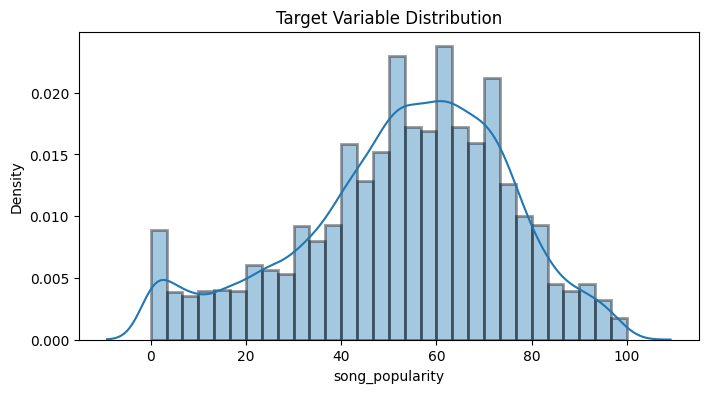

In [574]:
#analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target],hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

Normalverteilt mit durchshcnitt bei ungefähr 60

## **3.1 Boxplots der Audiofeatures**

<Axes: >

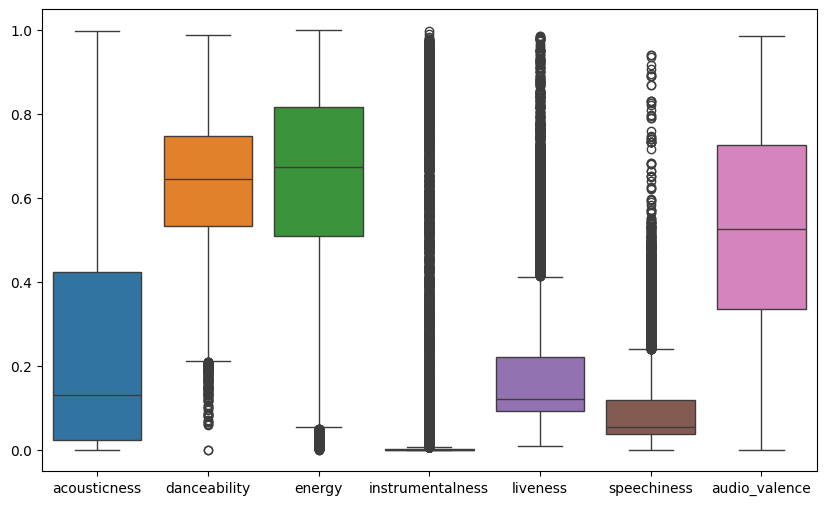

In [575]:
# Boxplot of audio features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'audio_valence']])


- **Akustik (Acousticness):** Zeigt eine breite Streuung, viele Songs haben eine niedrige akustische Komponente, was auf eine moderne, elektronische oder verstärkte Musikproduktion hindeuten könnte.
- **Tanzbarkeit (Danceability):** Die meisten Werte sind zentral verteilt, was eine generelle Tanzbarkeit der Songs anzeigt.
- **Energie (Energy):** Die Energie ist meistens hoch, was für aufregende oder laute Musik spricht.
- **Instrumentalität (Instrumentalness):** Sehr polarisiert, viele Songs haben entweder keine oder eine sehr hohe instrumentale Komponente, was auf eine klare Trennung zwischen rein instrumentaler Musik und gesangsbasierter Musik hindeutet.
- **Lebendigkeit (Liveness):** Die meisten Songs zeigen geringe Live-Komponenten, was typisch für Studioaufnahmen ist.
- **Sprechgesang (Speechiness):** Niedrige Werte dominieren, was üblich ist, außer Musik ist spezifisch sprechgesang-basiert.
- **Stimmung (Audio Valence):** Breite Verteilung, was auf eine vielfältige emotionale Palette in den Songs hinweist.

## **3.2 Histogramme der Audiofeatures**

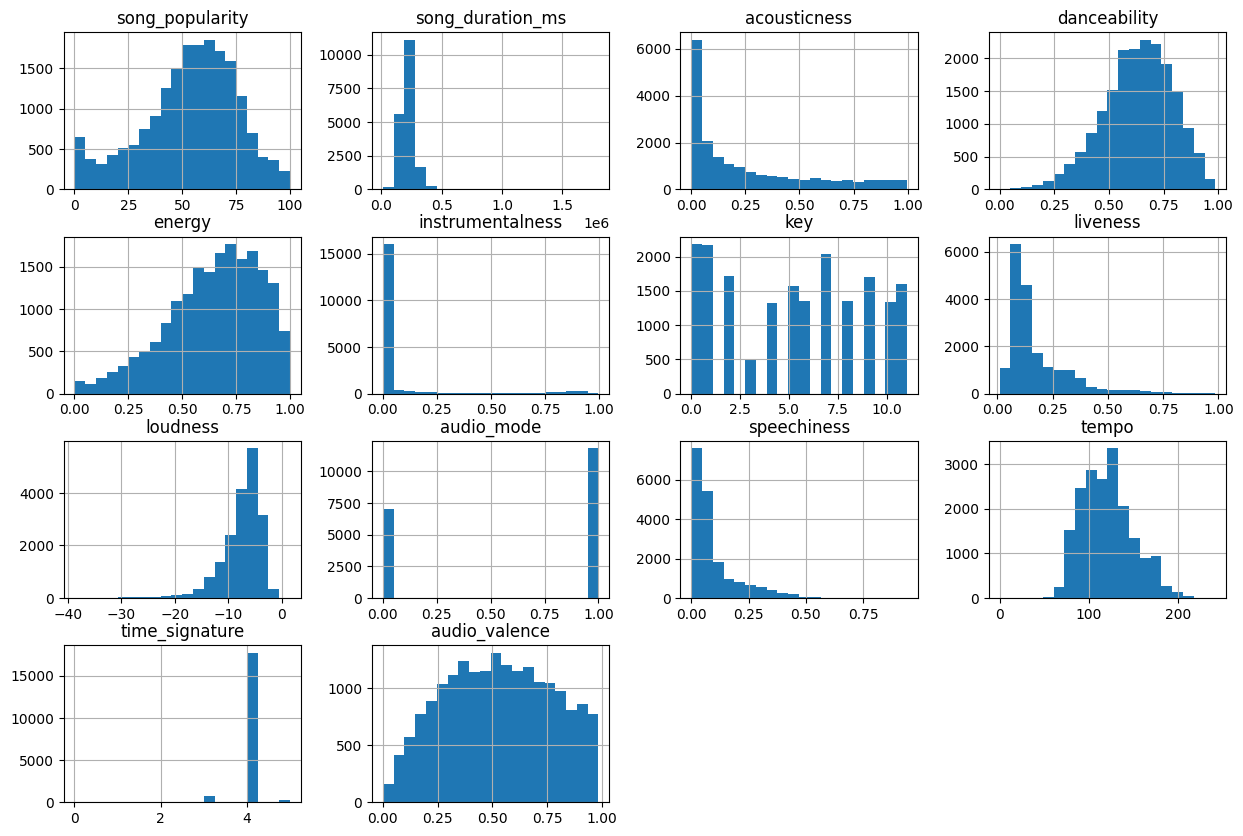

In [576]:
# Histograms of features
df.hist(bins=20, figsize=(15, 10))
plt.show()


Die Histogramme unten zeigen die Verteilungen der einzelnen Audiofeatures unseres Datensatzes. Diese Visualisierungen sind entscheidend, um das Verhalten der Daten zu verstehen und mögliche Muster zu erkennen, die nützlich für die Vorhersage der Songpopularität sein könnten:

- **Song Popularity**: Die Verteilung zeigt einen bimodalen Trend, was darauf hindeutet, dass Songs tendenziell entweder niedrig oder hoch bewertet werden, mit weniger Songs in der mittleren Popularitätsrange.
- **Song Duration**: Die meisten Songs haben eine Dauer von weniger als 300.000 Millisekunden (300 Sekunden). Sehr lange Songs sind selten, was in der steilen Abnahme der Histogrammkurve zu sehen ist.
- **Acousticness**: Viele Songs haben eine niedrige akustische Präsenz, was auf eine Dominanz von elektronisch verstärkter oder produzierter Musik hindeutet.
- **Danceability**: Die Verteilung ist annähernd normal, was darauf hinweist, dass die meisten Songs eine moderate Tanzbarkeit aufweisen.
- **Energy**: Die Energie der Songs zeigt eine leichte Rechtsschiefe, was bedeutet, dass viele Songs eine hohe Energiestufe besitzen.
- **Instrumentalness**: Sehr viele Songs haben eine nahezu null Instrumentalität, was auf eine geringe Präsenz von rein instrumentalen Tracks hindeutet.
- **Liveness**: Diese Verteilung zeigt, dass die meisten Songs geringe Live-Komponenten aufweisen, was typisch für Studioaufnahmen ist.
- **Loudness**: Die Lautstärke der Songs zeigt, dass die meisten Tracks relativ laut sind, mit Spitzenwerten um -5 Dezibel.
- **Speechiness**: Die Mehrheit der Songs hat sehr niedrige Sprechgesangswerte, was darauf hindeutet, dass reine Gesangseinlagen seltener sind.
- **Audio Valence**: Dieses Merkmal zeigt eine breite Verteilung, was auf eine vielfältige emotionale Palette in der Musik hinweist.
- **Tempo**: Das Tempo der Songs zeigt eine breite Verteilung mit einem Gipfel um 120 BPM, was einem üblichen Tempo für viele populäre Musikgenres entspricht.

Diese Visualisierungen sind entscheidend für das Verständnis der Datencharakteristik und werden in den nächsten Schritten der Analyse verwendet, um Modelle zur Vorhersage der Songpopularität zu entwickeln.


# **4. Datenaufbereitung für das Modelltraining**

## **4.1 Entfernen aller Duplikate**

In [577]:
#Removal of any Duplicate rows (if any)

counter = 0
rs, cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape == (rs, cs):
    print('\nSchlussfolgerung: Der Datensatz enthält keine Duplikate.')
else:
    print(f'\nSchlussfolgerung: Anzahl der entfernten/korrigierten Duplikate ---> {rs - df.shape[0]}')


Schlussfolgerung: Anzahl der entfernten/korrigierten Duplikate ---> 3911


## **4.2 Überprüfe für fehlende Werte**

In [578]:
# Check for empty elements
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values'] / df.shape[0], 3) * 100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


Im aktuellen Datensatz, wurden keine fehlenden Werte festgestellt. Dies zeigt, dass alle Spalten vollständig ausgefüllt sind und es keine Lücken oder leeren Felder gibt. Dies ist ein wichtiger Aspekt der Datenqualität, da fehlende Werte in der Regel zusätzliche Schritte zur Datenbereinigung und -imputation erfordern würden. Der Fehlen von fehlenden Werten vereinfacht die Analyse und Modellierung, da der Datensatz ohne zusätzliche Vorverarbeitungsschritte verwendet werden kann.

## **4.3 Kategorische Spalten zu Numerischen umändern**

Zur Vorbereitung der Daten auf die Modellierung wurden die kategorischen Spalten des DataFrames in numerische Werte umgewandelt. Zunächst wurden alle Kategorien mit einer Anzahl von einzigartigen Werten von 2 mittels One-Hot Encoding codiert. Diese Methode wurde nur einmal angewendet, um die Features effizient zu kodieren.

Für die Features mit mehr als 2 und weniger als 17 einzigartigen Werten wurde Dummy Encoding verwendet. Hierbei wurde jede Kategorie in separate Dummy-Variablen umgewandelt und die ursprüngliche kategorische Spalte wurde entfernt. Beide Kodierungsmethoden helfen dabei, die Daten für maschinelles Lernen und statistische Modelle in einem geeigneten Format bereitzustellen.

In [579]:
# Converting categorical columns to numeric
df3 = df.copy()
ecc = nvc[nvc['Percentage'] != 0].index.values
fcc = [i for i in features if i not in ecc]
# One-Hot Encoding and Dummy Encoding
oh = True
dm = True
for i in fcc:
    if df3[i].nunique() == 2:
        if oh:
            print("\nOne-Hot Encoding on features:")
        print(i)
        oh = False
        df3[i] = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if 2 < df3[i].nunique() < 17:
        if dm:
            print("\nDummy Encoding on features:")
        print(i)
        dm = False
        df3 = pd.concat([df3.drop([i], axis=1), pd.get_dummies(df3[i], drop_first=True, prefix=str(i))], axis=1)



Dummy Encoding on features:
key

One-Hot Encoding on features:
audio_mode
time_signature


### Im Rahmen der Datenvorbereitung wurden die folgenden Kodierungsmethoden auf die kategorischen Spalten angewendet:

- Dummy Encoding: 
    
    Für die Spalte key wurde Dummy Encoding verwendet, um die Kategorien in separate Dummy-Variablen zu transformieren. Diese Methode ermöglicht eine präzisere Modellierung, indem die ursprüngliche Spalte entfernt und durch Dummy-Variablen ersetzt wird.

- One-Hot Encoding:
    
    Die Spalten audio_mode und time_signature wurden mittels One-Hot Encoding kodiert. Dabei wurden die Kategorien in binäre Spalten umgewandelt, wobei die erste Kategorie weggelassen wurde, um die Dimension der Daten zu reduzieren und Multikollinearität zu vermeiden.

Durch diese Kodierungstechniken werden die kategorischen Daten in ein für Modelle geeignetes numerisches Format überführt, was die spätere Analyse und Modellierung erleichtert.

## **4.4 Entfernung von Ausreißern**

Ein Ausreißer ist ein Datenpunkt, der sich erheblich von den anderen Beobachtungen in einem Datensatz unterscheidet. Mit anderen Worten, es ist eine Beobachtung, die über den allgemeinen Trend hinausgeht. Der unten gezeigte Algorithmus wurde verwendet, um diese Werte zu identifizieren. In den ersten beiden Zeilen des Algorithmus werden die Berechnungen für das erste und dritte Quartil durchgeführt. Nach dieser Berechnung wird der Interquartilsabstand (IQR) berechnet. Der Quartilsabstand ist der Name, der der Differenz zwischen den 75%- und 25%-Werten der Datensätze gegeben wird. Mit anderen Worten, die Quartile repräsentieren die mittleren 50% der Daten. Dies zeigt uns, wie die Mittelwerte verteilt sind. Allgemein werden Werte, die 1,5-mal kleiner als das 25%-Quartil und 1,5-mal größer als das 75%-Quartil sind, als Ausreißer klassifiziert.
Insgesamt wurden 5.974 Ausreißer identifiziert, als diese Methode auf den Datensatz angewendet wurde. Diese Werte wurden aus dem Datensatz entfernt.

Resource: <a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a>

In [580]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf
for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\nSchlussfolgerung:\nVor der Entfernung der Ausreißer hatte der Datensatz {} Proben.'.format(df3.shape[0]))
print('Nach der Entfernung der Ausreißer enthält der Datensatz nun {} Proben.'.format(df1.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,True,0.0294,...,False,False,True,False,False,False,False,False,True,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,False,0.0498,...,False,False,False,False,False,False,False,False,True,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,True,0.1070,...,False,False,False,False,False,False,False,False,True,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,True,0.0313,...,False,False,False,False,True,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,False,0.1240,...,False,False,False,False,False,False,False,False,True,False



Schlussfolgerung:
Vor der Entfernung der Ausreißer hatte der Datensatz 14924 Proben.
Nach der Entfernung der Ausreißer enthält der Datensatz nun 8950 Proben.


## **4.5 Übersicht über finalen Datensatz**

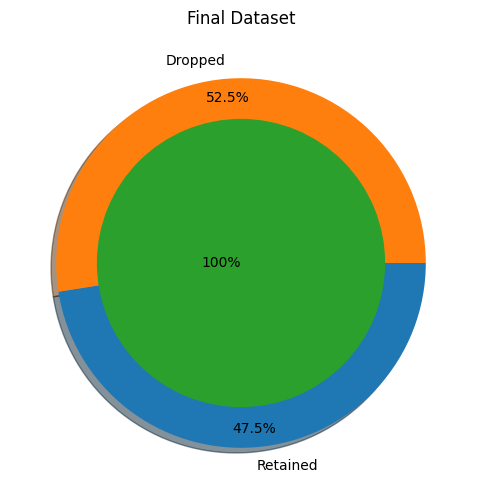


Schlussfolgerung: Nach dem Bereinigungsprozess wurden 9885 Proben entfernt, während 52.48% der Daten erhalten geblieben sind.


In [581]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mSchlussfolgerung:\033[0m Nach dem Bereinigungsprozess wurden {original_df.shape[0] - df.shape[0]} \
Proben entfernt, während {round(100 - (df.shape[0] * 100 / original_df.shape[0]), 2)}% der Daten erhalten geblieben sind.')


# **5. Datenmanipulation**

## **5.1 Aufteilung in Trainings- und Testdatensätze**
Die Daten wurden in Trainings- und Testsets aufgeteilt. Dies ist entscheidend, um eine Überanpassung des Modells zu vermeiden und eine unabhängige Bewertung der Modellleistung zu gewährleisten.


In [582]:
# Splitting the data into training & testing sets
df.columns = [i.replace(' ', '_') for i in df.columns.values]
X = df.drop([target], axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True, inplace=True)
print('Original set  ---> ', X.shape, Y.shape)
print('Training set  ---> ', Train_X.shape, Train_Y.shape)
print('Testing set   ---> ', Test_X.shape, Test_Y.shape)

Original set  --->  (8950, 26) (8950,)
Training set  --->  (7160, 26) (7160,)
Testing set   --->  (1790, 26) (1790,)


## **5.2 Feature-Skalierung**

Die Skalierung von Merkmalen (Feature Scaling) ist ein wichtiger Aspekt bei der Entwicklung von maschinellen Lernmodellen. Häufig enthalten Datensätze Merkmale, die sich stark in ihrer Größenordnung und ihren Einheiten unterscheiden. Während dies für einige Algorithmen des maschinellen Lernens kein Problem darstellt, kann es bei vielen anderen zu Schwierigkeiten führen. Viele Algorithmen im maschinellen Lernen, wie solche, die euklidische Distanzen zur Berechnung der Abstände zwischen zwei Punkten verwenden, sind empfindlich gegenüber Unterschieden in der Skalierung der Eingabedaten. Unangemessene Skalierung kann daher die Leistungsfähigkeit und die Genauigkeit der Modelle erheblich beeinträchtigen.


In [583]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('Standardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','Standardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                           Standardardization on Training set                                           


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,-2.143537e-16,-9.551639e-17,-4.381349e-16,-1.359558e-16,-2.480945e-18,-8.782546e-17,-9.824543e-17,1.984756e-17,1.081692e-16,-1.429024e-16,...,-1.389329e-17,7.591693e-17,4.465702e-17,5.185176e-17,-7.939025e-17,-2.431326e-17,-4.961891e-18,-1.265282e-17,2.838201e-16,-2.406517e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.625387e+00,-9.181177e-01,-2.918774e+00,-3.131156e+00,-3.425841e-01,-1.575563e+00,-2.825473e+00,-1.348254e+00,-9.812680e-01,-2.528553e+00,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,-4.358899e+00,-9.421778e-02
25%,-6.702830e-01,-8.223387e-01,-6.452384e-01,-6.864460e-01,-3.425841e-01,-6.881147e-01,-5.876500e-01,-1.348254e+00,-6.975836e-01,-7.615380e-01,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
50%,-6.177447e-02,-4.150227e-01,5.798743e-02,1.271097e-01,-3.411082e-01,-3.751120e-01,1.864114e-01,7.417001e-01,-4.002151e-01,-1.426259e-02,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
75%,6.146981e-01,5.921024e-01,7.219555e-01,8.042306e-01,-2.673929e-01,4.767485e-01,7.447833e-01,7.417001e-01,2.966273e-01,6.418977e-01,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
max,2.716562e+00,2.672887e+00,2.386143e+00,1.703690e+00,6.650948e+00,2.864200e+00,2.376364e+00,7.417001e-01,3.368207e+00,2.773299e+00,...,3.569706e+00,2.774865e+00,3.540476e+00,3.086975e+00,3.743058e+00,3.361905e+00,1.889444e+01,5.003635e+00,2.294157e-01,1.061371e+01



                                            Standardardization on Testing set                                            


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1.790000e+03,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,0.009632,-0.023773,-0.005688,...,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066,-5.954269e-18,0.041424,-0.029478,-0.016451
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.997307,0.968979,1.002542,...,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564,1.000279e+00,1.094508,1.059003,0.909471
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-1.348254,-0.972847,-2.236695,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,-4.358899,-0.094218
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-1.348254,-0.703373,-0.755222,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,0.741700,-0.412847,-0.021330,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.741700,0.323469,0.580851,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,0.741700,3.368207,2.675691,...,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905,1.889444e+01,5.003635,0.229416,10.613708


# **6. Feature Auswahl**

Die Auswahl von Merkmalen ist eine wichtige Methode im Bereich des maschinellen Lernens, die dazu dient, die Datengröße zu reduzieren. Ziel der Merkmalsauswahl ist es, eine neue Teilmenge von Merkmalen aus allen Merkmalen des Datensatzes zu erstellen. Einige der wichtigsten Gründe für die Verwendung der Merkmalsauswahl sind die Beschleunigung des Trainings von maschinellen Lernalgorithmen, die Verringerung der Komplexität eines Modells sowie die Erleichterung der Interpretation und die Reduzierung von Overfitting.

Resource: <a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a>

## **6.1 Visualisierung der Feature-Korrelationen**

In diesem Abschnitt erstellen wir eine Heatmap, um die Korrelationen zwischen den Features sowie zwischen den Features und der Zielvariablen `song_popularity` zu visualisieren. Die Heatmap hilft uns zu verstehen, welche Features möglicherweise einen starken Einfluss auf die Popularität eines Songs haben.


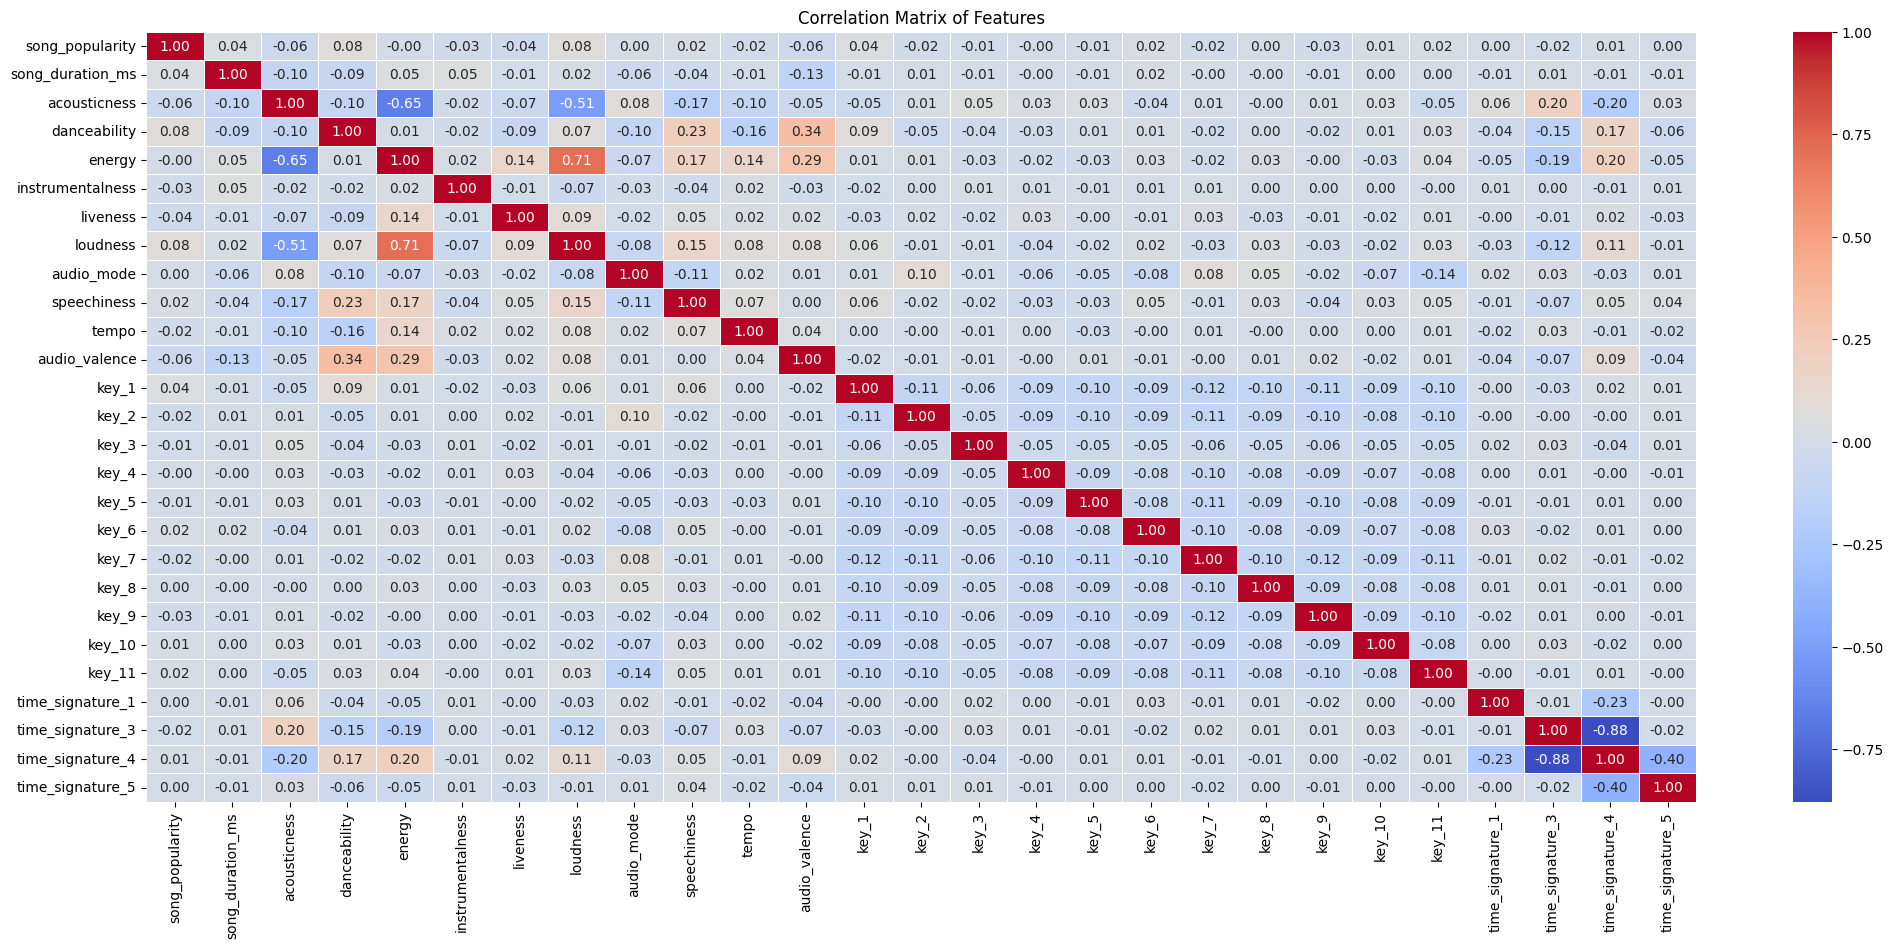

In [584]:
# Create the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

### Analyse der Korrelationsmatrix

Die Korrelationsmatrix visualisiert die Beziehungen zwischen verschiedenen Audiofeatures und der Songpopularität. Hier sind einige zentrale Beobachtungen:

- **Energie und Lautstärke**: Eine hohe positive Korrelation (0.71) zwischen `energy` und `loudness` zeigt, dass lautere Songs tendenziell energiegeladener sind.
- **Akustik und Energie**: Eine starke negative Korrelation (-0.65) zwischen `acousticness` und `energy` deutet darauf hin, dass Songs mit höherer Akustik tendenziell weniger energisch sind.
- **Akustik und Lautstärke**: Eine negative Korrelation (-0.51) zwischen `acousticness` und `loudness` suggeriert, dass akustische Tracks generell leiser sind.
- **Tanzbarkeit und emotionale Stimmung**: Eine moderate positive Korrelation (0.33) zwischen `danceability` und `audio_valence` lässt erkennen, dass tanzbarere Songs oft eine positivere emotionale Stimmung haben.
- **Instrumentalität**: Die `instrumentalness` zeigt keine signifikanten Korrelationen mit anderen Features, was ihre Unabhängigkeit unterstreicht.
- **time_signature**: Die `time_signature` zeigt signifikante Korrelationen mit den anderen `time_signature` Features, was gegen ihre Unabhängingkeit spricht.
- **Songpopularität**: Die Zielvariable `song_popularity` zeigt keine starken Korrelationen mit den anderen Features, was nahelegt, dass die Popularität eines Songs durch eine komplexere Kombination von Faktoren beeinflusst wird, die über diese einzelnen Features hinausgeht.

Diese Einsichten sind entscheidend für die Entwicklung präziser Modelle zur Vorhersage der Songpopularität, da sie aufzeigen, welche Features möglicherweise zusammenwirken oder unabhängig betrachtet werden sollten.

***


## **6.2 Automatic Method - RFE**

### Zielsetzung: Multikollinearität reduzieren
Multikollinearität kann die Stabilität und Interpretierbarkeit von Regressionsmodellen beeinträchtigen. Die Methode der Variance Inflation Factor (VIF) wird verwendet, um Multikollinearität zu quantifizieren und zu adressieren. Hohe VIF-Werte deuten darauf hin, dass eine Variable stark mit anderen Variablen korreliert ist, was die Modellleistung negativ beeinflussen kann.

### Berechnung des VIF
Der VIF wird für jede Feature-Spalte in den Daten berechnet. Der Code zur Berechnung des VIF lautet wie folgt:

In [585]:
# Function to calculate VIF
def calculate_vif(X):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the dataframe X.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the features for which VIF is to be calculated.
    
    Returns:
    pd.DataFrame: DataFrame containing the features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

### Initiale VIF-Berechnung
Bevor die Feature-Auswahl (RFE) durchgeführt wird, wird der VIF für alle Features berechnet, um den Ausgangswert der Multikollinearität zu prüfen:

In [586]:
# Step 1: Checking VIF before feature selection to identify multicollinearity
vif_before = calculate_vif(Train_X_std)
print("VIF before RFE:")
print(vif_before)

VIF before RFE:
             feature       VIF
0   song_duration_ms  1.045981
1       acousticness  1.958638
2       danceability  1.436847
3             energy  3.506162
4   instrumentalness  1.024834
5           liveness  1.043880
6           loudness  2.215660
7         audio_mode  1.108038
8        speechiness  1.156630
9              tempo  1.068430
10     audio_valence  1.459122
11             key_1  1.706425
12             key_2  1.643690
13             key_3  1.219966
14             key_4  1.533724
15             key_5  1.623475
16             key_6  1.544817
17             key_7  1.769327
18             key_8  1.528378
19             key_9  1.670319
20            key_10  1.507248
21            key_11  1.622399
22  time_signature_1       inf
23  time_signature_3       inf
24  time_signature_4       inf
25  time_signature_5       inf


In [587]:
# Step 2: Initialize lists to store RMSE values for Train and Test datasets
Trr = []  # Train RMSE
Tss = []  # Test RMSE
m = df.shape[1] - 2

### Durchführung der RFE und Bewertung
Eine Schleife wird verwendet, um RFE durchzuführen und die Root Mean Squared Error (RMSE) für Trainings- und Testdatensätze zu berechnen:

In [588]:
# Step 3: Loop to perform RFE and calculate RMSE
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1] - i)  # Running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    selected_features = Train_X_std.columns[rfe.support_]

    # Checking VIF after RFE to monitor multicollinearity
    vif_after = calculate_vif(Train_X_std.loc[:, rfe.support_])
    print(f"VIF after RFE for iteration {i}:")
    print(vif_after)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

VIF after RFE for iteration 0:
             feature       VIF
0   song_duration_ms  1.045981
1       acousticness  1.958638
2       danceability  1.436847
3             energy  3.506162
4   instrumentalness  1.024834
5           liveness  1.043880
6           loudness  2.215660
7         audio_mode  1.108038
8        speechiness  1.156630
9              tempo  1.068430
10     audio_valence  1.459122
11             key_1  1.706425
12             key_2  1.643690
13             key_3  1.219966
14             key_4  1.533724
15             key_5  1.623475
16             key_6  1.544817
17             key_7  1.769327
18             key_8  1.528378
19             key_9  1.670319
20            key_10  1.507248
21            key_11  1.622399
22  time_signature_1       inf
23  time_signature_3       inf
24  time_signature_4       inf
25  time_signature_5       inf
VIF after RFE for iteration 1:
             feature       VIF
0   song_duration_ms  1.045122
1       acousticness  1.954296
2       

### Visualisierung der RMSE
Die RMSE-Werte für Trainings- und Testdatensätze werden geplottet, um die Modellleistung während der RFE-Iteration zu visualisieren:

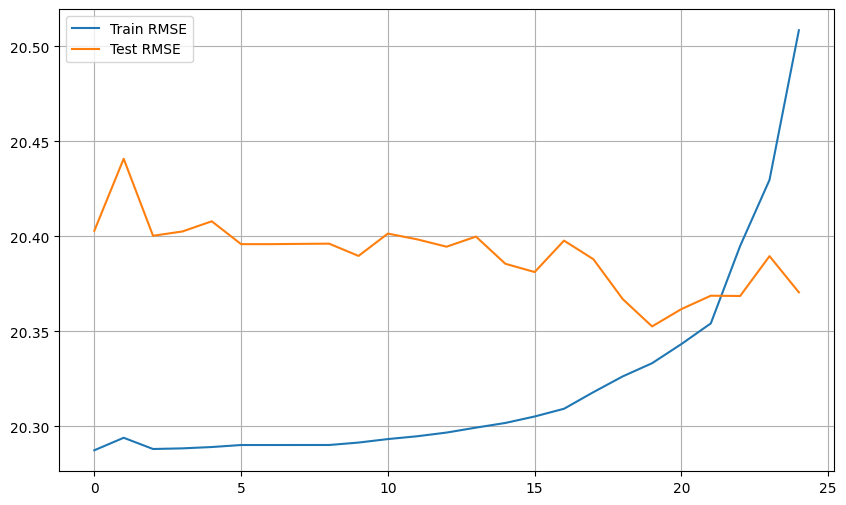

In [589]:
# Step 4: Plotting RMSE for Train and Test datasets
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

### Auswahl der endgültigen Features
Die endgültige Feature-Auswahl wird basierend auf der RFE durchgeführt. Der VIF für diese ausgewählten Features wird überprüft, um sicherzustellen, dass die Multikollinearität reduziert wurde:

In [590]:
# Step 5: Shortlisting the selected Features (with RFE)
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1] - df.shape[1] + 10)  # Running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

selected_features_final = Train_X_std.columns[rfe.support_]

# Checking VIF for the final selected features
vif_final = calculate_vif(Train_X_std.loc[:, rfe.support_])
print("VIF for final selected features:")
print(vif_final)

VIF for final selected features:
            feature       VIF
0  song_duration_ms  1.034017
1      acousticness  1.930023
2      danceability  1.244949
3            energy  3.347868
4          liveness  1.036053
5          loudness  2.161636
6     audio_valence  1.406720
7             key_2  1.017716
8             key_7  1.015814


### Evaluierung der linearen Regression
Das Modell wird mit den endgültig ausgewählten Features trainiert und die RMSE für Trainings- und Testdatensätze werden berechnet:

In [591]:
# Step 6: Evaluating Linear Regression Model
LR = LinearRegression()
LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

print("Linear Regression RMSE:")
print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Linear Regression RMSE:
20.318048532828218
20.388036077109874


### Anwendung der Ridge-Regression
Zur weiteren Handhabung der Multikollinearität wird Ridge-Regression verwendet, und die RMSE-Werte werden erneut berechnet:

In [592]:
# Step 7: Using Ridge Regression to handle multicollinearity and evaluating its performance
ridge = Ridge()
ridge.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

pred1_ridge = ridge.predict(Train_X_std.loc[:, rfe.support_])
pred2_ridge = ridge.predict(Test_X_std.loc[:, rfe.support_])

print("Ridge Regression RMSE:")
print(np.sqrt(mean_squared_error(Train_Y, pred1_ridge)))
print(np.sqrt(mean_squared_error(Test_Y, pred2_ridge)))


Ridge Regression RMSE:
20.318048569153447
20.387980637249132


### Schlussfolgerung
Der endgültige VIF für die ausgewählten Features wird angezeigt, um die Wirksamkeit der Multikollinearitätsreduktion durch RFE und Ridge-Regression zu bewerten:

In [593]:
# Final VIF Output for Selected Features
print("Final VIF Output for Selected Features:")
print(vif_final)

Final VIF Output for Selected Features:
            feature       VIF
0  song_duration_ms  1.034017
1      acousticness  1.930023
2      danceability  1.244949
3            energy  3.347868
4          liveness  1.036053
5          loudness  2.161636
6     audio_valence  1.406720
7             key_2  1.017716
8             key_7  1.015814


### Schlussfolgerung zur endgültigen VIF-Ausgabe für die ausgewählten Features:

Nach der Durchführung der Recursive Feature Elimination (RFE) und der weiteren Modellierung haben wir die finalen Variance Inflation Factor (VIF)-Werte für die ausgewählten Features ermittelt. Diese Werte zeigen, dass die Multikollinearität der Features erfolgreich reduziert wurde. Die finalen VIF-Werte sind wie folgt:

Die meisten Features weisen niedrige VIF-Werte auf, was darauf hinweist, dass die Mehrzahl der ausgewählten Features nur geringfügig mit anderen Features korreliert ist. Ein VIF-Wert unter 5 deutet typischerweise auf eine akzeptable Multikollinearität hin. Die einzigen Ausnahmen sind energy und loudness, die höhere VIF-Werte aufweisen, jedoch immer noch innerhalb eines akzeptablen Bereichs liegen.

Diese Ergebnisse bestätigen, dass die Feature-Auswahl und die darauf folgenden Modellanpassungen effektiv zur Reduzierung der Multikollinearität beigetragen haben. Das Modell sollte nun robuster gegenüber Multikollinearitätseinflüssen sein und eine bessere Performance bei der Vorhersage bieten.

# **7. Modelltraining und Bewertung**

### Einleitung
In diesem Abschnitt untersuchen wir die Leistungsfähigkeit verschiedener maschineller Lernmodelle zur Vorhersage der Songpopularität. Durch den Vergleich von Modellen wie lineare Regression, Entscheidungsbaum, Random Forest und neuronales Netzwerk zielen wir darauf ab, das Modell zu identifizieren, das die beste Vorhersageleistung bietet.


### Modelle und Methodik
Wir verwenden die folgenden Modelle für unsere Analyse:
1. **Lineare Regression**: Einfaches Modell, das eine lineare Beziehung zwischen den Features und der Zielvariablen annimmt.
2. **Entscheidungsbaum**: Modelliert Entscheidungsregeln aus den Daten.
3. **Random Forest**: Ein Ensemble-Modell bestehend aus vielen Entscheidungsbaum, das die Genauigkeit verbessern soll.
4. **Neuronales Netzwerk**: Kann komplexe nicht-lineare Muster in den Daten erkennen.

### Trainingsprozess
Die Modelle werden unter Verwendung derselben Trainingsdaten trainiert, und es wird eine Kreuzvalidierung durchgeführt, um ihre Stabilität und Zuverlässigkeit zu gewährleisten.


### Leistungsvergleich
Die Modelle werden anhand von Mean Squared Error (MSE) und R²-Score evaluiert, um ihre Vorhersagegenauigkeit und Anpassungsfähigkeit zu vergleichen.







## **7.1 Auswahl der Korrekten Daten**

In [594]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Train_X_std, Train_Y, test_size=0.2, random_state=42)

# Splitting the data into training and validation sets using selected features
X_train = X_train[selected_features_final]
X_val = X_val[selected_features_final]


## **7.2 Lineares Regressionsmodell**

Lineare Regression ist ein Verfahren aus der Familie der Regressionsalgorithmen, das darauf abzielt, Beziehungen und Abhängigkeiten zwischen Variablen zu ermitteln. Es handelt sich um ein Modell, das eine kontinuierliche, abhängige Variable \(y\) in Beziehung setzt zu einer oder mehreren unabhängigen Variablen, die durch den Vektor \(X\) dargestellt werden.

Das Modell beschreibt diese Beziehung durch eine lineare Funktion:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + e
$$

Dabei sind:



- $\beta_0, \beta_1, \ldots, \beta_n$ : die Koeffizienten oder Parameter des Modells.
- $e$ : der Fehlerterm, der die Abweichungen der Vorhersagen vom tatsächlichen Wert beschreibt.





In der Regressionsanalyse ist das Ziel, eine kontinuierliche Zielvariable vorherzusagen, wohingegen in einem anderen Bereich, der Klassifikation, Labels aus einer endlichen Menge vorhergesagt werden.

Lineare Regression gehört auch zur Kategorie der überwachten Lernverfahren. Das bedeutet, dass das Modell auf einer Menge von gelabelten Daten (Trainingsdaten) trainiert wird und anschließend verwendet wird, um Vorhersagen auf ungelabelten Daten (Testdaten) zu treffen.

Resource: <a href="https://www.researchgate.net/profile/Vladimir-Nasteski/publication/328146111_An_overview_of_the_supervised_machine_learning_methods/links/5c1025194585157ac1bba147/An-overview-of-the-supervised-machine-learning-methods.pdf">An overview of the supervised machine learning methods</a>

In [595]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_lin = lin_reg.predict(X_val)

# Calculate performance metrics
mse_lin = mean_squared_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)

# Output the performance
print('Linear Regression Mean Squared Error:', mse_lin)
print('Linear Regression R2 Score:', r2_lin)

Linear Regression Mean Squared Error: 428.60181275025946
Linear Regression R2 Score: 0.03484271002236505


Die lineare Regression zeigt einen MSE von 428.60 und einen R²-Score von 0.035. Diese Ergebnisse deuten darauf hin, dass das Modell eine geringe Vorhersagegenauigkeit aufweist und nur einen kleinen Anteil der Varianz in den Daten erklären kann.

## **7.3 Entscheidungsbaum**

Ein Entscheidungsbaum (Decision Tree) ist ein weit verbreitetes maschinelles Lernverfahren, das sowohl für Klassifikations- als auch für Regressionsaufgaben verwendet wird.

### Funktionsweise eines Entscheidungsbaums
1. Struktur: 

    Ein Entscheidungsbaum besteht aus Knoten und Zweigen. Die Knoten repräsentieren Entscheidungen oder Tests an einem Attribut, während die Zweige die Ergebnisse dieser Tests und zu den nächsten Knoten führen. Die Blätter des Baums repräsentieren die endgültigen Entscheidungen oder Vorhersagen.
    
2. Bau des Baumes: 

    Der Baum wird durch wiederholtes Teilen des Datensatzes nach bestimmten Kriterien gebaut. Diese Kriterien basieren darauf, wie gut ein Split die Klassen oder Werte in den Daten trennt. Der Prozess des Teilens wird rekursiv fortgesetzt, bis eine vorgegebene Tiefe erreicht ist oder keine signifikante Verbesserung mehr erzielt wird.

3. Splitting-Kriterien:
    - Gini-Index: Ein Maß für die Ungleichheit in einer Verteilung, das verwendet wird, um die "Reinheit" eines Splits zu beurteilen. Ein niedrigerer Gini-Index bedeutet eine homogenere Verteilung.
    - Entropie: Ein Maß für die Unsicherheit oder Unordnung, das in der Informationstheorie verwendet wird. In Entscheidungsbäumen wird die Entropie genutzt, um die Information Gain zu berechnen.
    - Information Gain: Der Gewinn an Information durch einen bestimmten Split, berechnet als Differenz der Entropie vor und nach dem Split.

### Mathematische Grundlagen

1. Gini-Index: 

    Der Gini-Index für einen Split in einem Knoten t wird wie folgt berechnet
    $$
    \text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
    $$
    Wobei pi der Anteil der Klasse i am Knoten t ist.

2. Entropie und Information Gain: 

    - Die Entropie H eines Knoten X wird wie folgt berechnet
        $$
        H(x) = - \sum_{i=1}^{N} P_i \cdot \log_2(P_i)
        $$

    - Der Information Gain durch einen Split wird dann berechnet als:
        $$
        \text{IG} = H(\text{parent}) - \left( \frac{N_{\text{left}}}{N_{\text{parent}}} \cdot H(\text{left}) + \frac{N_{\text{right}}}{N_{\text{parent}}} \cdot H(\text{right}) \right)
        $$
        wobei N_left, N_right und N_parent die Anzahl der Beispiele im linken, rechten und ursprünglichen Knoten sind.


Resource: <a href="https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1">Gini Impurity and Entropy for Decision Tree</a>

Resource: <a href="https://www.geeksforgeeks.org/decision-tree-introduction-example/">Decision Tree in Machine Learning</a>

Resource: <a href="https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052">Decision Trees in Machine Learning, Prashant Gupta</a>


In [596]:
# Initialize and train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_tree = tree_reg.predict(X_val)

# Calculate performance metrics
mse_tree = mean_squared_error(y_val, y_pred_tree)
r2_tree = r2_score(y_val, y_pred_tree)

# Output the performance
print('Decision Tree Mean Squared Error:', mse_tree)
print('Decision Tree R2 Score:', r2_tree)

Decision Tree Mean Squared Error: 835.0729748603352
Decision Tree R2 Score: -0.8804791425821492


Das Decision Tree Modell zeigt einen MSE von 835.07 und einen R²-Score von -0.880. Diese Ergebnisse deuten auf eine sehr geringe Modellleistung hin, da der hohe MSE und der stark negative R²-Score anzeigen, dass das Modell schlechter abschneidet als ein einfaches Mittelwertmodell und die Varianz der Zielvariable nicht sinnvoll erklärt.

## **7.3 Random Forest Modell**


Ein Random Forest ist eine erweiterte Methode des Entscheidungsbaums, die durch die Aggregation mehrerer Entscheidungsbäume die Vorhersagegenauigkeit und die Robustheit verbessert.

### Funktionsweise eines Random Forest
1. Struktur:
Ein Random Forest besteht aus einer Vielzahl von Entscheidungsbäumen, die unabhängig voneinander auf verschiedenen Bootstraps des Trainingsdatensatzes trainiert werden. Jeder Baum trägt eine Stimme zur Vorhersage bei, und die endgültige Entscheidung wird durch Mehrheitsentscheidung (bei Klassifikation) oder Mittelwertbildung (bei Regression) getroffen.

2. Bau des Waldes:
    - Bei der Konstruktion eines Random Forests wird für jeden Baum eine zufällige Auswahl von Trainingsdaten (mit Zurücklegen) verwendet, bekannt als Bootstrapping.
    - Bei jedem Split in einem Baum wird eine zufällige Untermenge der Merkmale betrachtet, was die Korrelation zwischen den Bäumen reduziert und die Generalisierungsfähigkeit des Modells verbessert.

3. Vorteile:
    - Höhere Genauigkeit und Robustheit gegenüber Überanpassung (Overfitting) im Vergleich zu einzelnen Entscheidungsbäumen.
    - Geringere Anfälligkeit für Ausreißer und Rauschen in den Daten.

Mathematische Grundlagen
4. Bootstrapping:
    - Das Bootstrapping-Verfahren erstellt mehrere Stichproben (mit Zurücklegen) aus dem ursprünglichen Datensatz. Jeder Entscheidungsbaum wird auf einer dieser Stichproben trainiert.

5. Random Subspace Method:
    - Bei jedem Split wird eine zufällige Untermenge der Merkmale ausgewählt. Dies wird mathematisch durch die Auswahl eines Unterraums der Merkmale beschrieben.

6. Mehrheitsentscheidung und Mittelwertbildung:
    - Bei der Klassifikation wird die Vorhersage des Random Forest durch die Mehrheitsentscheidung der einzelnen Bäume bestimmt. Mathematisch bedeutet dies: 
        $$
        \hat{y} = \text{Mode} \{ h_1(x), h_2(x), \ldots, h_B(x) \}
        $$
        wobei hi(x)  die Vorhersage des i-ten Baums für den Eingabewert x ist.
    - Bei der Regression wird die Vorhersage durch den Durchschnitt der Vorhersagen der einzelnen Bäume gebildet:
        $$
        \hat{y}_d = \frac{1}{B} \sum_{i=1}^{B} h_i(x)
        $$
        wobei B die Anzahl der Bäume im Wald ist.


Resource: <a href="https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/">Random Forest Algorithm in Machine Learning</a>

Resource: <a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Understanding Random Forest</a>







In [597]:
# Initialize and train the random forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_forest = forest_reg.predict(X_val)

# Calculate performance metrics
mse_forest = mean_squared_error(y_val, y_pred_forest)
r2_forest = r2_score(y_val, y_pred_forest)

# Output the performance
print('Random Forest Mean Squared Error:', mse_forest)
print('Random Forest R2 Score:', r2_forest)

Random Forest Mean Squared Error: 436.35416499293126
Random Forest R2 Score: 0.017385389360380366


Das Random Forest Modell zeigt einen MSE von 436.35 und einen R²-Score von 0.017. Diese Ergebnisse deuten darauf hin, dass das Modell eine begrenzte Vorhersagegenauigkeit aufweist und nur einen sehr kleinen Anteil der Varianz in den Daten erklären kann.

## **7.4 Neuronales Netzwerk**

**Funktionsweise Neuronaler Netzwerke**

Neuronale Netzwerke, inspiriert durch das menschliche Gehirn, nutzen ein Netzwerk aus künstlichen Neuronen, um Funktionen zu modellieren. Jedes Neuron in einem solchen Netzwerk erhält Eingangssignale, die es basierend auf der Wichtigkeit dieser Signale gewichtet. Diese gewichteten Signale werden dann aufsummiert und durch eine Aktivierungsfunktion geleitet, um das Ausgangssignal des Neurons zu erzeugen.

**Grundbausteine:**

Künstliche Neuronen: Diese sind den biologischen Neuronen nachempfunden. Jedes Neuron empfängt Eingangssignale, gewichtet sie und leitet sie durch eine Aktivierungsfunktion.
Gewichte (w-Werte): Diese bestimmen, wie stark jedes Eingangssignal berücksichtigt wird.
Aktivierungsfunktion (f): Transformiert die summierten gewichteten Eingänge in ein Ausgangssignal, das weitergeleitet wird.
Von biologischen zu künstlichen Neuronen:
Ein neuronales Netzwerk nutzt diese künstlichen Neuronen als Bausteine, um komplexe Modelle zu erstellen. Die Eingangssignale werden von den Dendriten aufgenommen, durch den Zellkörper summiert und, wenn ein bestimmter Schwellenwert erreicht wird, als Ausgangssignal weitergeleitet.

**Netzwerkarchitektur:**

Aktivierungsfunktionen: Sie bestimmen, wie die Signale innerhalb des Netzwerks transformiert werden. Bekannte Beispiele sind die Sigmoid-Funktion und die ReLU-Funktion.
Netzwerktopologie: Beschreibt, wie Neuronen im Netzwerk angeordnet sind, einschließlich der Anzahl der Neuronen, der Schichten und deren Verbindungen.
Trainingsalgorithmus:
Neuronale Netzwerke lernen durch einen Prozess namens Backpropagation, bei dem Fehler rückwärts durch das Netzwerk geleitet werden, um die Gewichte anzupassen. Dieser Prozess verwendet Gradientenabstieg, um effizient den besten Weg zur Minimierung des Fehlers zu finden.

Resource: <a href="https://learning.oreilly.com/library/view/machine-learning-with/9781782162148/ch07.html#ch07lvl1sec37">Machine Learning with R</a>

In [598]:
# Initialize and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_nn = nn_model.predict(X_val)

# Calculate performance metrics
mse_nn = mean_squared_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)

# Output the performance
print('Neural Network Mean Squared Error:', mse_nn)
print('Neural Network R2 Score:', r2_nn)

Neural Network Mean Squared Error: 432.9975303054032
Neural Network R2 Score: 0.024944107830727313


Das neuronale Netzwerk zeigt einen MSE von 433.00 und einen R²-Score von 0.025. Diese Ergebnisse deuten darauf hin, dass das Modell eine geringe Vorhersagegenauigkeit aufweist und nur wenig zur Erklärung der Varianz in den Daten beiträgt.

## **7.5 Vergleich der Modellleistung**

Nachdem wir mehrere Modelle trainiert und evaluiert haben, vergleichen wir nun ihre Leistung anhand der berechneten Metriken MSE und R². Dies hilft uns, das Modell auszuwählen, das die beste Leistung bietet.


In [599]:
# Comparison of model performance
# Create a DataFrame to hold model performance metrics
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE': [mse_lin, mse_tree, mse_forest, mse_nn],
    'R2 Score': [r2_lin, r2_tree, r2_forest, r2_nn]
})

# Display the DataFrame to see the comparison
display(model_performance)

,Model,MSE,R2 Score
0,Linear Regression,428.601813,0.034843
1,Decision Tree,835.072975,-0.880479
2,Random Forest,436.354165,0.017385
3,Neural Network,432.997530,0.024944


## **7.6 Visualisierung der Modellleistungen**

Im folgenden Abschnitt wird die Leistung verschiedener Vorhersagemodelle anhand ihrer mittleren quadratischen Fehler (MSE) und R2-Scores visualisiert. Diese Visualisierung hilft dabei, die Effektivität jedes Modells schnell zu beurteilen und zu vergleichen, um das Modell mit der besten Gesamtleistung zu identifizieren.


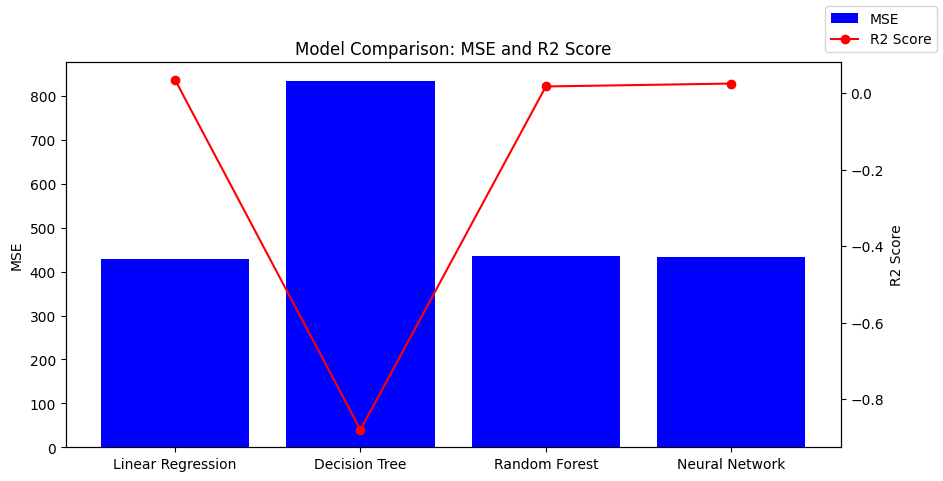

In [600]:
# Define the models and their performance scores for comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mse_scores = [mse_lin, mse_tree, mse_forest, mse_nn]  # Mean Squared Error for each model
r2_scores = [r2_lin, r2_tree, r2_forest, r2_nn]  # R2 Score for each model

# Non-optimized performance metrics (saving for later
mse_lin_default = mse_lin  # non-optimized MSE for Linear Regression
r2_lin_default = r2_lin    # non-optimized R² Score for Linear Regression

mse_dt_default = mse_tree  # non-optimized MSE for Decision Tree
r2_dt_default = r2_tree    # non-optimized R² Score for Decision Tree

mse_rf_default = mse_forest  # non-optimized MSE for Random Forest
r2_rf_default = r2_forest    # non-optimized R² Score for Random Forest

mse_nn_default = mse_nn      # non-optimized MSE for Neural Network
r2_nn_default = r2_nn        # non-optimized R² Score for Neural Network

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Setting the title of the plot
ax1.set_title('Model Comparison: MSE and R2 Score')

# Create a bar chart for MSE on the primary y-axis
ax1.bar(models, mse_scores, color='blue', label='MSE')
ax1.set_ylabel('MSE')  # Label for the primary y-axis

# Create a second y-axis for the R2 scores
ax2 = ax1.twinx()
ax2.plot(models, r2_scores, color='red', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score')  # Label for the secondary y-axis

# Adding legend to the figure
fig.legend()

# Show the plot
plt.show()

### Ergebnisse und Diskussion

Die vorstehende Visualisierung vergleicht die Leistung verschiedener Modelle hinsichtlich des mittleren quadratischen Fehlers (MSE) und des R2-Scores. Der Vergleich verdeutlicht, dass das Lineare Reressions Modell die beste Leistung erbringt, gefolgt von dem Neural Network. Das Modelle des Entscheidungsbaums zeigt signifikant schlechtere Ergebnisse. 


# **8. Hyperparameter-Tuning für alle Modell**

**Ziel des Hyperparameter-Tunings:**
Das Ziel des Hyperparameter-Tunings ist es, die Konfigurationen der Modelle zu optimieren, um ihre maximale Leistungsfähigkeit zu erreichen. 

**Gründe für die Auswahl:**

1. **Beste Modellleistung maximieren:**
   Durch das Hyperparameter-Tuning des besten Modells (Random Forest) können wir sicherstellen, dass wir die bestmögliche Leistung aus diesem Modell herausholen. Dies ist entscheidend, da das Random Forest Modell bereits in den initialen Tests die beste Leistung gezeigt hat.

2. **Potenzielle Verbesserungen im schlechtesten Modell:**
   Auch das schlechteste Modell (Neuronal Network) verdient eine Untersuchung, um zu sehen, ob durch optimierte Hyperparameter eine signifikante Leistungssteigerung erzielt werden kann. Ein schlecht performendes Modell kann nach der Optimierung überraschend gut abschneiden und eine sinnvolle Alternative darstellen.


## **8.1 Hyperparameter-Tuning für Ridge und Lasso**

#### Warum Ridge- und Lasso-Regression für Hyperparameter-Tuning verwenden?

1. Überanpassung (Overfitting) vermeiden:

    Bei der einfachen linearen Regression gibt es keine regulären Hyperparameter, um das Modell zu regularisieren. Dies kann dazu führen, dass das Modell bei komplexen Datensätzen zu stark an die Trainingsdaten angepasst wird, was zu Überanpassung führt. Überanpassung bedeutet, dass das Modell die Trainingsdaten sehr gut vorhersagt, aber auf neuen, unbekannten Daten schlecht abschneidet.

    Die Techniken Ridge- und Lasso-Regression fügen eine Regularisierung hinzu, die hilft, Überanpassung zu vermeiden. Ridge-Regression fügt eine Strafe für große Koeffizienten hinzu, während Lasso-Regression zusätzlich Koeffizienten auf null setzen kann, was die Anzahl der verwendeten Features reduziert. Diese Regularisierung macht das Modell robuster und verhindert, dass es zu stark auf die Trainingsdaten zugeschnitten wird.
    


2. Hyperparameter-Tuning:

    Bei der normalen linearen Regression gibt es keine Hyperparameter, die optimiert werden können. Das Modell hat keine Möglichkeit, sich anzupassen oder zu regulieren, um die besten Ergebnisse zu erzielen.

    Ridge- und Lasso-Regression Methoden beinhalten Hyperparameter, die optimiert werden können (z.B. der Alpha-Wert). Der Alpha-Wert steuert die Stärke der Regularisierung. Durch Hyperparameter-Tuning kann man den optimalen Wert für diesen Parameter finden, der die beste Balance zwischen Bias (Fehlermarge) und Varianz (Modellkomplexität) bietet.

In [601]:
# Define the parameter grid for Ridge and Lasso regression
param_grid_ridge = {
    'alpha': np.logspace(-4, 4, 10)  # Regularization strength
}

param_grid_lasso = {
    'alpha': np.logspace(-4, 4, 10)  # Regularization strength
}

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Initialize GridSearchCV for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)

# Initialize GridSearchCV for Lasso Regression
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_lasso.fit(X_train, y_train)

# Output the best parameters and corresponding scores
print("Best Ridge parameters found: ", grid_search_ridge.best_params_)
print("Best Lasso parameters found: ", grid_search_lasso.best_params_)

# Evaluate the Ridge Regression model
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')

# Evaluate the Lasso Regression model
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print(f'Lasso Regression Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Ridge parameters found:  {'alpha': np.float64(166.81005372000558)}
Best Lasso parameters found:  {'alpha': np.float64(0.0001)}
Ridge Regression Mean Squared Error: 428.88099784574905
Ridge Regression R^2 Score: 0.03421402035715848
Lasso Regression Mean Squared Error: 428.6026001849788
Lasso Regression R^2 Score: 0.0348409368185727


1. **Ergebnisse des Tunings**

    Durch die Anwendung von RandomizedSearchCV wurden 10 Kombinationen von Hyperparametern getestet, insgesamt 50 Fits für jede Modellkonfiguration. Die besten Parameter für die Ridge- und Lasso-Regression wurden wie folgt identifiziert:

    - Ridge Regression:

        - Bestes Parameteralpha: 166.81

    - Lasso Regression:

        - Bestes Parameteralpha: 0.0001

2. **Leistung der optimierten Modelle**

    - Ridge Regression:

        - Mean Squared Error (MSE): 428.88
        - R² Score: 0.0342
    - Lasso Regression:

        - Mean Squared Error (MSE): 428.60
        - R² Score: 0.0348

3. **Interpretation**

    Die besten Parameter für die Ridge-Regression führen zu einem MSE von 428.88 und einem R²-Score von 0.0342. Die Lasso-Regression mit dem besten Parameteralpha von 0.0001 erzielt einen leicht besseren MSE von 428.60 und einen R²-Score von 0.0348. Beide Modelle zeigen eine vergleichbare Leistung mit nur marginalen Unterschieden in den Ergebnissen. Die MSE-Werte sind relativ hoch und die R²-Scores nahe bei null, was darauf hinweist, dass beide Modelle nur wenig zur Erklärung der Varianz in den Daten beitragen.

4. **Schlussfolgerungen**

    Die Ergebnisse des Tunings deuten darauf hin, dass sowohl die Ridge- als auch die Lasso-Regression eine ähnliche und relativ geringe Vorhersagegenauigkeit bieten. Die Unterschiede in der Modellleistung sind marginal, und beide Modelle sind nicht besonders leistungsfähig für die gegebene Aufgabe. Es wird empfohlen, alternative Modellansätze zu testen oder zusätzliche Optimierungen vorzunehmen, um die Vorhersagegenauigkeit zu verbessern. Eine tiefere Analyse der Daten und der möglichen Einflussfaktoren könnte ebenfalls hilfreich sein.

### **8.1.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Ridge und Lasso**

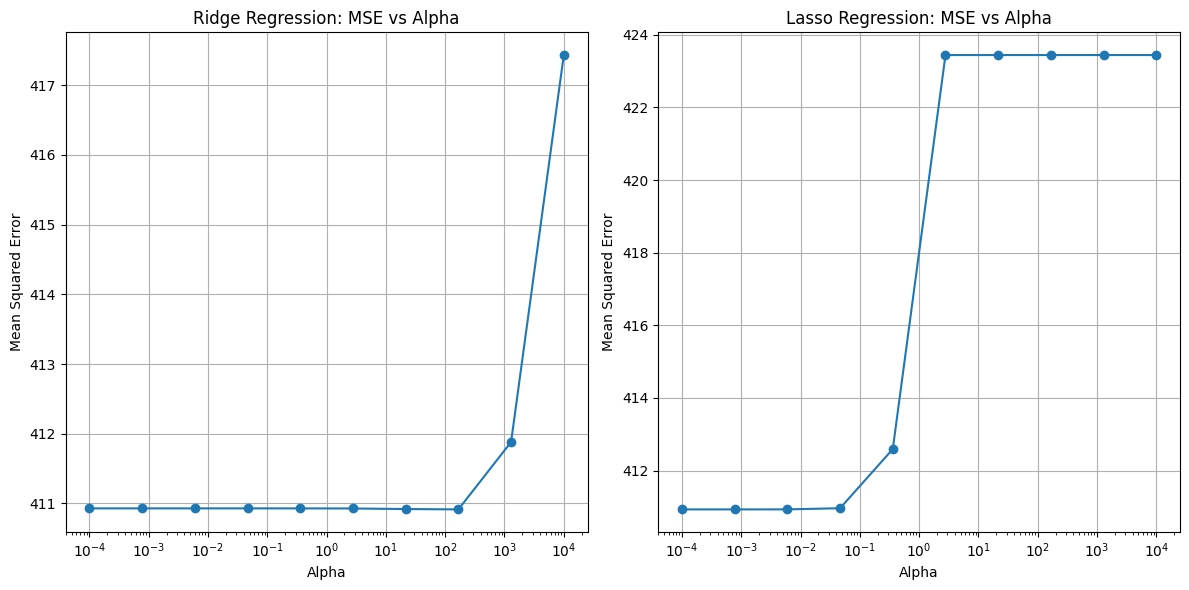

In [602]:
# Plotting the effect of regularization parameter alpha on Ridge and Lasso
alphas = param_grid_ridge['alpha']

plt.figure(figsize=(12, 6))

# Ridge Regression MSE vs Alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, -grid_search_ridge.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.title('Ridge Regression: MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Lasso Regression MSE vs Alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, -grid_search_lasso.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.title('Lasso Regression: MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()

## **8.2 Hyperparameter-Tuning für Decision Tree**

In [603]:
# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)  # Negate to get the positive MSE

# Evaluate the best Decision Tree model
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_val)
best_mse_dt = mean_squared_error(y_val, y_pred_best_dt)
best_r2_dt = r2_score(y_val, y_pred_best_dt)

print(f'Optimized Decision Tree Mean Squared Error: {best_mse_dt}')
print(f'Optimized Decision Tree R^2 Score: {best_r2_dt}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score found:  483.3159890946261
Optimized Decision Tree Mean Squared Error: 505.7582496086314
Optimized Decision Tree R^2 Score: -0.1389038661405042


1. **Ergebnisse des Tunings**

    Durch die Anwendung von RandomizedSearchCV wurden 648 Kombinationen von Hyperparametern getestet, insgesamt 3240 Fits. Die optimale Parameterkonfiguration für den Decision Tree wurde wie folgt identifiziert:

    - Kriterium zur Bestimmung der Qualität von Splits (criterion): 'friedman_mse'
    - Maximale Tiefe der Bäume (max_depth): 10
    - Maximale Anzahl der Merkmale, die bei jedem Split berücksichtigt werden (max_features): 'sqrt'
    - Minimale Anzahl von Stichproben in einem Blatt (min_samples_leaf): 1
    - Minimale Anzahl von Stichproben zum Teilen eines Knotens (min_samples_split): 10

2. **Interpretation**

    Die identifizierte optimale Konfiguration zeigt, dass die Verwendung des Kriteriums 'friedman_mse', eine maximale Tiefe von 10 und die Auswahl von Merkmalen basierend auf der Quadratwurzel ('sqrt') zu einer verbesserten Modellkonfiguration führen. Die geringe Anzahl von Stichproben in Blättern und eine moderate Anzahl zum Teilen eines Knotens können die Flexibilität des Modells beeinflussen. Trotz dieser Anpassungen bleibt die Gesamtperformance des Modells jedoch suboptimal.

3. **Leistung des optimierten Modells**

    - Mean Squared Error (MSE): 505.76
    - R² Score: -0.139
    Diese Ergebnisse zeigen, dass das optimierte Modell einen höheren MSE von 505.76 aufweist und einen negativen R²-Score von -0.139 erzielt. Dies deutet darauf hin, dass das Modell schlechter abschneidet als ein einfaches Mittelwertmodell und nicht in der Lage ist, die Varianz der Zielvariable sinnvoll zu erklären.

4. **Schlussfolgerungen**

    Trotz der deutlichen verberseerungen legen die Ergebnisse des Tunings nahe, dass das Decision Tree Modell in seiner aktuellen Form möglicherweise nicht für die gegebene Aufgabe geeignet ist. Der hohe MSE und der negative R²-Score deuten darauf hin, dass die Modellanpassungen nicht die gewünschte Verbesserung gebracht haben. Es wird empfohlen, alternative Modellansätze zu prüfen und möglicherweise weitere Anpassungen vorzunehmen, um die Leistung des Modells zu verbessern. Eine tiefere Analyse der Dateneigenschaften und der Modellkonfiguration könnte ebenfalls hilfreich sein.

### **8.2.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Decision Tree**

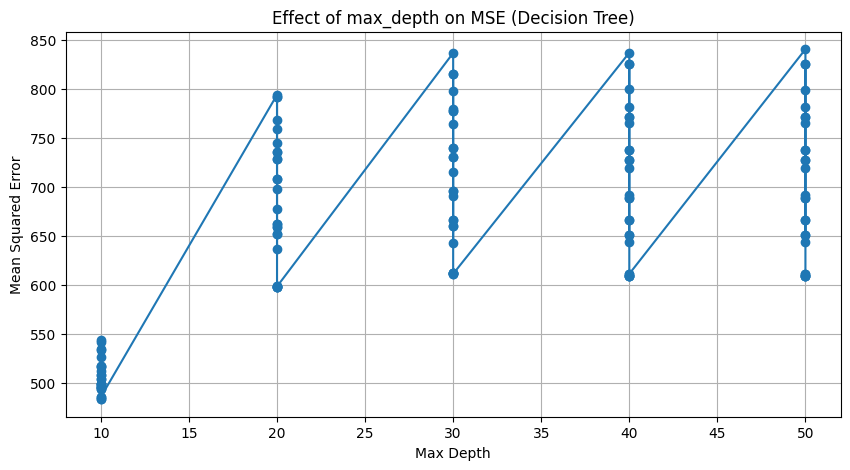

In [604]:
# Example: Plot the effect of 'max_depth' on validation scores
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

# Extract the max_depth values and their corresponding scores
depths = [p['max_depth'] for p in params if 'max_depth' in p]
scores = [-mean_test_scores[i] for i, p in enumerate(params) if 'max_depth' in p]

plt.figure(figsize=(10, 5))
plt.plot(depths, scores, marker='o')
plt.title('Effect of max_depth on MSE (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

## **8.3 Hyperparameter-Tuning für Random Forest**

In [605]:
# Define the parameter grid to be used in Random Search
param_dist = {
    'n_estimators': np.arange(100, 301, 100),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],          # Number of features to consider at every split
    'max_depth': [10, 50, 100, None],          # Maximum number of levels in tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],                # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Method of selecting samples for training each tree
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with the parameter distribution
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error'
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_rf = best_rf.predict(X_val)
best_mse_rf = mean_squared_error(y_val, y_pred_best_rf)
best_r2_rf = r2_score(y_val, y_pred_best_rf)

print(f'Optimized Random Forest Mean Squared Error: {best_mse_rf}')
print(f'Optimized Random Forest R^2 Score: {best_r2_rf}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': np.int64(200), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Optimized Random Forest Mean Squared Error: 426.0142827642034
Optimized Random Forest R^2 Score: 0.04066950159156657


1. **Ergebnisse des Tunings**

    Durch die Anwendung von RandomizedSearchCV wurden 10 Kombinationen von Hyperparametern getestet, insgesamt 30 Fits. Die optimale Parameterkonfiguration wurde wie folgt identifiziert:

    - Anzahl der Bäume (n_estimators): 200
    - Maximale Tiefe der Bäume (max_depth): 10
    - Minimale Anzahl von Stichproben zum Teilen eines Knotens (min_samples_split): 5
    - Minimale Anzahl von Stichproben in einem Blatt (min_samples_leaf): 1
    - Methode der Stichprobenauswahl für das Training jedes Baums (bootstrap): True
    - Maximale Anzahl der Merkmale, die bei jedem Split berücksichtigt werden (max_features): 'sqrt'

2. **Interpretation**

    Die identifizierte optimale Konfiguration zeigt, dass ein Random Forest mit 200 Bäumen, einer maximalen Tiefe von 10 und der Bootstrap-Methode eine moderate Modellperformance erzielt. Die Verwendung einer festen Anzahl von Merkmalen ('sqrt') bei jedem Split und eine geringe Anzahl von Stichproben in Blättern und Knoten tragen zur Modellgenauigkeit bei. Die Bootstrap-Methode ermöglicht es, dass die Bäume auf zufälligen Teilmengen der Daten trainiert werden, was in diesem Fall zu einer Verbesserung geführt hat.

3. **Leistung des optimierten Modells**

    - Mean Squared Error (MSE): 426.01
    - R² Score: 0.041
    Diese Ergebnisse zeigen, dass das optimierte Modell eine gewisse Verbesserung im Vergleich zu vorherigen Modellen erzielt hat, jedoch immer noch eine relativ geringe Vorhersagegenauigkeit aufweist. Der R²-Score von 0.041 deutet darauf hin, dass das Modell nur einen geringen Teil der Varianz der Zielvariablen erklären kann.

3. **Schlussfolgerungen**

    Die Ergebnisse unterstützen die Entscheidung, das Random Forest Modell mit den identifizierten optimalen Hyperparametern weiter zu verwenden. Es wird jedoch empfohlen, zusätzliche Tests und Anpassungen vorzunehmen, um die Modellgenauigkeit weiter zu verbessern. Weitere Maßnahmen könnten eine detailliertere Analyse der Dateneigenschaften oder das Testen alternativer Modellansätze umfassen, um die Vorhersagegenauigkeit zu erhöhen.

### **8.3.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Random Forest**

Nach dem Hyperparameter-Tuning des Random Forest Modells, visualisieren wir die Auswirkungen der Anzahl der Bäume (n_estimators) auf den Mean Squared Error (MSE).

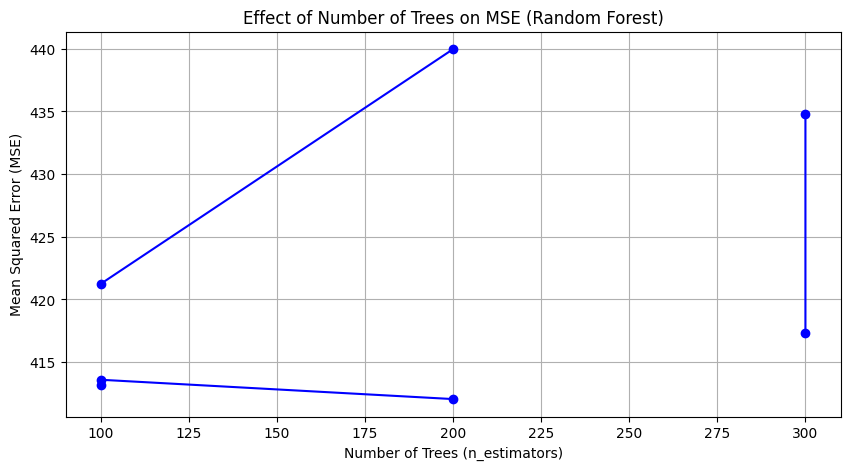

In [606]:
# Extract results for plotting
results = random_search.cv_results_
mean_test_scores = -results['mean_test_score']  # Convert negative MSE to positive
params = results['params']

# Prepare data for plotting
# Extract the number of estimators and their corresponding MSE values
n_estimators_values = [p['n_estimators'] for p in params]
mse_scores_rf = [mean_test_scores[i] for i, p in enumerate(params) if 'n_estimators' in p]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, mse_scores_rf, marker='o', linestyle='-', color='b')
plt.title('Effect of Number of Trees on MSE (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


## **8.4 Hyperparameter-Tuning für das Neuronale Netzwerk**

### Ziel des Hyperparameter-Tunings
Das Ziel des Hyperparameter-Tunings für das neuronale Netzwerk besteht darin, die Konfiguration zu optimieren, um die Vorhersagegenauigkeit zu maximieren. Durch das Testen verschiedener Kombinationen von Hyperparametern soll die beste Lösung für unser spezifisches Problem gefunden werden.

### Prozess des Hyperparameter-Tunings
Das Tuning wurde mittels der Grid-Search-Methode durchgeführt, die systematisch durch eine Vielzahl von Konfigurationen iteriert, um die optimale Kombination basierend auf der niedrigsten mittleren quadratischen Fehlerquote (MSE) zu ermitteln.

### Implementierung des Hyperparameter-Tunings

In [607]:
# Define the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Initialize GridSearchCV with MLPRegressor
grid_search_nn = GridSearchCV( estimator=MLPRegressor(random_state=42), param_grid=param_grid_nn, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_nn.fit(X_train, y_train)

# Output the best parameters and corresponding score
print(f'Best parameters for Neural Network: {grid_search_nn.best_params_}')
best_nn_model = grid_search_nn.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_nn = best_nn_model.predict(X_val)
mse_best_nn = mean_squared_error(y_val, y_pred_best_nn)
r2_best_nn = r2_score(y_val, y_pred_best_nn)

print(f'Optimized Neural Network Mean Squared Error: {mse_best_nn}')
print(f'Optimized Neural Network R^2 Score: {r2_best_nn}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Optimized Neural Network Mean Squared Error: 427.33123072059095
Optimized Neural Network R^2 Score: 0.03770390069391194


1. **Ergebnisse des Tunings**

    Durch die Anwendung von GridSearchCV wurden 72 Kombinationen von Hyperparametern systematisch getestet, insgesamt 216 Fits. Die optimale Parameterkonfiguration, die sich als effektivste erwies, umfasst:
    - Hidden Layer Sizes: (100) – eine Schicht mit 100 Neuronen,
    - Aktivierungsfunktion: 'tanh' – verwendet die hyperbolische Tangensfunktion,
    - Solver: 'adam' – verwendet den Adam-Optimierer,
    - Lernrate: 'constant' – konstante Lernrate während des Trainings,
    - Maximale Iterationen: 200 – begrenzt die Anzahl der Trainingsdurchgänge.

2. **Leistung des optimierten Modells**

    Das optimierte Modell erreichte einen mittleren quadratischen Fehler (MSE) von 427.33 und einen R²-Score von 0.0377. Dies deutet darauf hin, dass das Modell eine geringe prädiktive Leistung aufweist, aber leicht bessere Ergebnisse als die vorherige Konfiguration liefert.

3. **Interpretation**

    Die Konfiguration mit einer versteckten Schicht von 100 Neuronen und der Aktivierungsfunktion 'tanh' zeigt eine leichte Verbesserung gegenüber anderen getesteten Konfigurationen. Der R²-Score von 0.0377 und der MSE von 427.33 deuten darauf hin, dass das Modell eine nur marginale Verbesserung im Vergleich zu den vorherigen Ergebnissen erzielt hat. Die Gesamtleistung des Modells bleibt jedoch begrenzt, was darauf hindeutet, dass möglicherweise entweder das Modell selbst oder die Art und Weise, wie die Features modelliert und verwendet werden, nicht optimal für die gegebene Aufgabe sind.

4. **Schlussfolgerungen**

    Die Ergebnisse des Tunings legen nahe, dass das neuronale Netzwerk in seiner aktuellen Form möglicherweise nicht die effektivste Methode zur Vorhersage dieser spezifischen Datensätze ist. Es wird empfohlen, weitere Untersuchungen anzustellen, insbesondere im Bereich des Feature-Engineerings oder alternative Modellansätze zu prüfen, die möglicherweise besser geeignet sind. Eine Erweiterung des Datensatzes oder eine tiefere Analyse der Dateneigenschaften könnten ebenfalls zur Verbesserung der Modellleistung beitragen.

### **8.4.1 Visualisierung der Hyperparameter-Tuning-Ergebnisse für Neuronales Netzwerk**

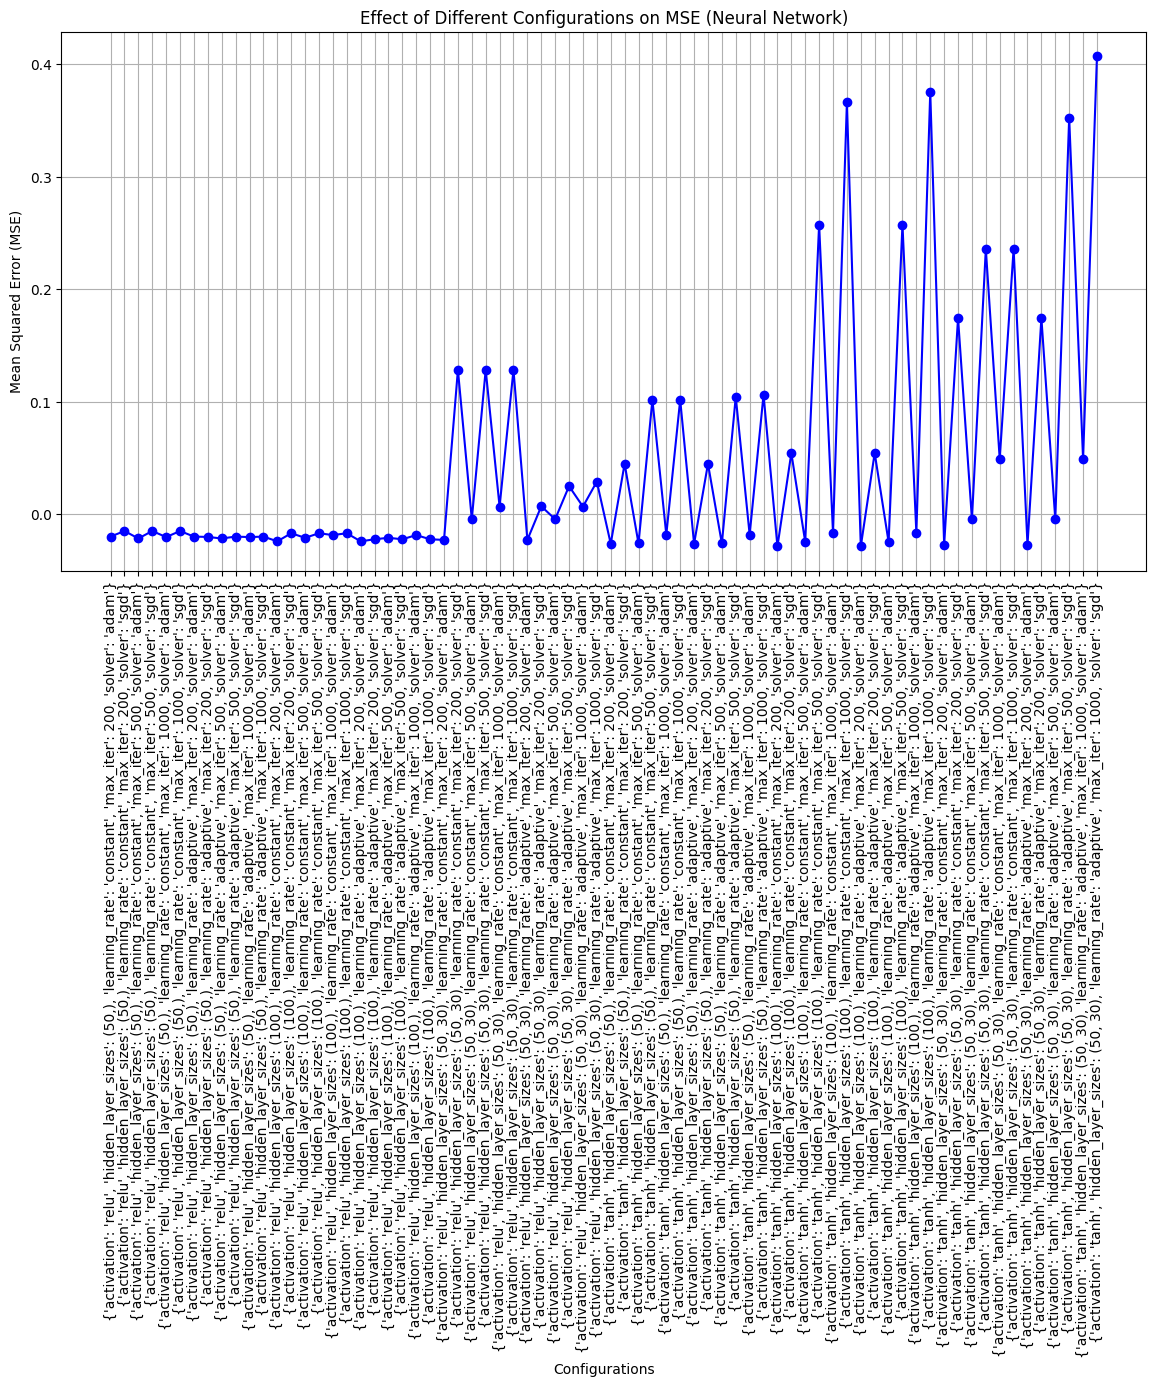

In [608]:
# Extract results for plotting
results = grid_search_nn.cv_results_
mean_test_scores = -results['mean_test_score']  # Convert negative MSE to positive
params = results['params']

# Prepare data for plotting
configurations = [str(p) for p in params]  # Convert parameter dictionaries to strings
mse_scores_nn = mean_test_scores

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(configurations, mse_scores_nn, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Effect of Different Configurations on MSE (Neural Network)')
plt.xlabel('Configurations')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

# **9. Cross-Validierung**

## **9.1.1 Cross-Validierung für das optimierte Ridge-Regressions Modell**

In [609]:
# Ridge-Regression Kreuzvalidierung
ridge = Ridge(alpha=grid_search_ridge.best_params_['alpha'])  # Bestes Alpha von GridSearchCV
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_ridge = -cv_scores_ridge
print(f'Cross-Validated MSE Scores für Ridge-Regression: {cv_mse_scores_ridge}')
print(f'Mean Cross-Validated MSE für Ridge-Regression: {np.mean(cv_mse_scores_ridge)}')
print(f'Standardabweichung der Cross-Validated MSE für Ridge-Regression: {np.std(cv_mse_scores_ridge)}')


Cross-Validated MSE Scores für Ridge-Regression: [409.84364619 415.18281132 431.6835187  403.89859901 393.96704126]
Mean Cross-Validated MSE für Ridge-Regression: 410.91512329724037
Standardabweichung der Cross-Validated MSE für Ridge-Regression: 12.547163580076191


1. **Ergebnisse der Cross-Validierung**
    - Cross-Validated MSE Scores für Ridge-Regression: [409.84, 415.18, 431.68, 403.90, 393.97]
    - Mean Cross-Validated MSE für Ridge-Regression: 410.92
    - Standardabweichung der Cross-Validated MSE für Ridge-Regression: 12.55

2. **Interpretation**

    Die Cross-Validation-Ergebnisse zeigen, dass das Ridge-Regression-Modell eine durchschnittliche MSE von 410.92 aufweist. Diese MSE-Werte deuten auf eine moderate Modellleistung hin. Die Standardabweichung der MSE-Werte beträgt 12.55, was auf eine gewisse Variabilität in der Modellperformance hindeutet. Diese Variabilität könnte durch die Unterschiede in den verwendeten Datenpartitionen bedingt sein und sollte bei der Modellbewertung berücksichtigt werden.
    
3. **Schlussfolgerungen**

    Die Cross-Validation-Ergebnisse legen nahe, dass das Ridge-Regression-Modell eine vergleichbare Leistung wie das Lasso-Regression-Modell bietet. Beide Modelle zeigen eine ähnliche durchschnittliche MSE, jedoch mit einer leichten Variabilität. Es wäre sinnvoll, weitere Modellanpassungen vorzunehmen oder zusätzliche Modelle zu testen, um die Vorhersagegenauigkeit zu optimieren. Die Ergebnisse unterstützen die Überlegung, das Modell weiter zu verfeinern und zu evaluieren.

## **9.1.2 Cross-Validierung für das optimierte Lasso-Regressions Modell**

In [610]:

# Lasso-Regression Kreuzvalidierung
lasso = Lasso(alpha=grid_search_lasso.best_params_['alpha'])  # Bestes Alpha von GridSearchCV
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_lasso = -cv_scores_lasso
print(f'Cross-Validated MSE Scores für Lasso-Regression: {cv_mse_scores_lasso}')
print(f'Mean Cross-Validated MSE für Lasso-Regression: {np.mean(cv_mse_scores_lasso)}')
print(f'Standardabweichung der Cross-Validated MSE für Lasso-Regression: {np.std(cv_mse_scores_lasso)}')

Cross-Validated MSE Scores für Lasso-Regression: [409.83561192 415.30340245 432.17125608 403.53550043 393.80354644]
Mean Cross-Validated MSE für Lasso-Regression: 410.92986346197733
Standardabweichung der Cross-Validated MSE für Lasso-Regression: 12.802416409010814


1. **Ergebnisse der Cross-Validierung**
    - Cross-Validated MSE Scores für Lasso-Regression: [409.84, 415.30, 432.17, 403.54, 393.80]
    - Mean Cross-Validated MSE für Lasso-Regression: 410.93
    - Standardabweichung der Cross-Validated MSE für Lasso-Regression: 12.80

2. **Interpretation**

    Die Cross-Validation-Ergebnisse zeigen, dass das Lasso-Regression-Modell eine durchschnittliche MSE von 410.93 aufweist. Dies deutet darauf hin, dass das Modell eine moderate Genauigkeit bietet. Die Standardabweichung der MSE-Werte beträgt 12.80, was auf eine gewisse Variabilität in der Modellleistung hinweist. Diese Variabilität könnte durch Unterschiede in den Datensätzen während der Cross-Validation bedingt sein und sollte bei der weiteren Analyse berücksichtigt werden.

3. **Schlussfolgerungen**

    Die Ergebnisse der Cross-Validation zeigen, dass das Lasso-Regression-Modell eine solide Leistung bietet, jedoch noch Raum für Verbesserungen besteht. Die beobachtete Variabilität der MSE-Werte legt nahe, dass das Modell unter bestimmten Bedingungen unterschiedlich abschneiden kann. Es könnte hilfreich sein, zusätzliche Optimierungsstrategien zu untersuchen oder andere Modelle zu vergleichen, um die Vorhersagegenauigkeit weiter zu verbessern.

## **9.2 Cross-Validierung für das optimierte Decision Tree Modell**

In [611]:
# Cross-Validation on the optimized Decsion Tree Modell
cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_dt = -cv_scores_dt
print(f'Cross-Validated MSE Scores for Decsion Tree: {cv_mse_scores_dt}')
print(f'Mean Cross-Validated MSE for Decsion Tree: {np.mean(cv_mse_scores_dt)}')
print(f'Standard Deviation of Cross-Validated MSE for Decsion Treet: {np.std(cv_mse_scores_dt)}')


Cross-Validated MSE Scores for Decsion Tree: [485.83054963 504.41138414 487.62172026 465.58181122 473.13448023]
Mean Cross-Validated MSE for Decsion Tree: 483.3159890946261
Standard Deviation of Cross-Validated MSE for Decsion Treet: 13.326981767230881


1. **Ergebnisse der Cross-Validierung**

    - Cross-Validated MSE Scores for Decision Tree: [485.83, 504.41, 487.62, 465.58, 473.13]
    - Mean Cross-Validated MSE for Decision Tree: 483.32
    - Standard Deviation of Cross-Validated MSE for Decision Tree: 13.33

2. **Interpretation**

    Die Cross-Validation-Ergebnisse zeigen, dass das optimierte Decision Tree Modell eine relativ hohe durchschnittliche MSE von 483.32 aufweist. Diese Werte deuten darauf hin, dass das Modell im Vergleich zu anderen getesteten Modellen tendenziell eine höhere Fehlerquote aufweist. Die Standardabweichung der MSE-Werte beträgt 13.33, was auf eine mäßige Variabilität in der Modellperformance hinweist. Diese Variabilität könnte durch die Unterschiede in den Trainingsdatensätzen verursacht werden und sollte bei der Modellbewertung berücksichtigt werden.

3. **Schlussfolgerungen**

    Die Cross-Validation-Ergebnisse legen nahe, dass das Decision Tree Modell derzeit eine suboptimale Leistung zeigt. Die hohe durchschnittliche MSE und die beobachtete Variabilität deuten darauf hin, dass das Modell möglicherweise nicht die beste Wahl für das Vorhersageproblem ist. Es könnte sinnvoll sein, andere Modelltypen zu erwägen oder zusätzliche Optimierungsstrategien anzuwenden, um die Vorhersagegenauigkeit zu verbessern.

## **9.3 Cross-Validierung für das optimierte Random Forest Modell**

#### Ziel der Cross-Validierung
Das Ziel der Cross-Validierung ist es, die Stabilität und Generalisierbarkeit des optimierten Modells zu überprüfen. Durch die Anwendung von Cross-Validierung können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, unbekannten Daten performt.

#### Durchführung
Die Cross-Validierung wurde durchgeführt, indem das Modell mehrfach auf unterschiedlichen Teilmengen des Trainingsdatensatzes trainiert und evaluiert wurde.

In [612]:
# Cross-Validation on the optimized Random Forest model
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_rf = -cv_scores_rf
print(f'Cross-Validated MSE Scores for Random Forest: {cv_mse_scores_rf}')
print(f'Mean Cross-Validated MSE for Random Forest: {np.mean(cv_mse_scores_rf)}')
print(f'Standard Deviation of Cross-Validated MSE for Random Forest: {np.std(cv_mse_scores_rf)}')


Cross-Validated MSE Scores for Random Forest: [410.62399024 414.29278619 434.42670619 404.52462453 389.50230534]
Mean Cross-Validated MSE for Random Forest: 410.67408249796637
Standard Deviation of Cross-Validated MSE for Random Forest: 14.583172762474733


1. **Ergebnisse der Cross-Validierung**
    - Cross-Validated MSE Scores for Random Forest: [410.62, 414.29, 434.43, 404.52, 389.50]
    - Mean Cross-Validated MSE for Random Forest: 410.67
    - Standard Deviation of Cross-Validated MSE for Random Forest: 14.58

2. **Interpretation**

    Die Ergebnisse der Cross-Validierung zeigen, dass das optimierte Random Forest Modell eine relativ konsistente Leistung über verschiedene Datenteilungen hinweg bietet. Die durchschnittliche MSE liegt bei 410.67, was darauf hindeutet, dass das Modell eine moderate Genauigkeit aufweist. Die Standardabweichung der MSE-Werte beträgt 14.58, was auf eine höhere Variabilität in der Modellperformance hinweist. Diese Variabilität könnte durch Unterschiede in den Datenpartitionen bedingt sein und sollte bei der Bewertung der Modellstabilität berücksichtigt werden.

3. **Schlussfolgerungen**

    Die Ergebnisse der Cross-Validierung deuten darauf hin, dass das Random Forest Modell eine durchschnittliche Leistung zeigt, jedoch eine gewisse Variabilität aufweist. Die Beobachtungen legen nahe, dass weitere Maßnahmen zur Modellverbesserung sinnvoll sein könnten. Es könnte vorteilhaft sein, zusätzliche Feinabstimmungen am Modell vorzunehmen oder den Datensatz zu erweitern, um die Vorhersagegenauigkeit zu erhöhen und die beobachtete Variabilität zu reduzieren.


## **9.4 Cross-Validation für das optimierte neuronale Netzwerk-Modell**

#### Ziel der Cross-Validation
Das Ziel der Cross-Validation ist es, die Stabilität und Generalisierbarkeit des optimierten neuronalen Netzwerk-Modells zu überprüfen. Durch die Anwendung von Cross-Validation können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, ungesehenen Daten performt.

#### Durchführung der Cross-Validation

In [613]:
# Cross-Validation on the optimized Neural Network model
cv_scores_nn = cross_val_score(best_nn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_nn = -cv_scores_nn
print(f'Cross-Validated MSE Scores for Neural Network: {cv_mse_scores_nn}')
print(f'Mean Cross-Validated MSE for Neural Network: {np.mean(cv_mse_scores_nn)}')
print(f'Standard Deviation of Cross-Validated MSE for Neural Network: {np.std(cv_mse_scores_nn)}')



Cross-Validated MSE Scores for Neural Network: [406.76858741 412.19899353 432.78092255 404.1022802  392.5155897 ]
Mean Cross-Validated MSE for Neural Network: 409.67327467604173
Standard Deviation of Cross-Validated MSE for Neural Network: 13.222722770643914


1. **Ergebnisse der Cross-Validation**
    - Cross-Validated MSE Scores for Neural Network: [406.77, 412.20, 432.78, 404.10, 392.52]
    - Mean Cross-Validated MSE for Neural Network: 409.67
    - Standard Deviation of Cross-Validated MSE for Neural Network: 13.22

2. **Interpretation**

    Die Cross-Validation-Ergebnisse zeigen, dass das optimierte neuronale Netzwerk-Modell relativ konsistente Leistungen über verschiedene Datenpartitionen hinweg aufweist. Die durchschnittliche MSE liegt bei 409.67, was eine Verbesserung im Vergleich zu den vorherigen Ergebnissen darstellen könnte. Die Standardabweichung der MSE-Werte beträgt 13.22, was auf eine gewisse Variabilität in der Modellperformance hinweist. Diese Variabilität könnte durch verschiedene Datenpartitionen bedingt sein und sollte bei der weiteren Modellbewertung berücksichtigt werden.

3. **Schlussfolgerungen**

    Die Ergebnisse der Cross-Validation deuten darauf hin, dass das neuronale Netzwerk-Modell eine insgesamt bessere Leistung zeigt. Dennoch gibt es noch Raum für weitere Optimierungen. Es könnte hilfreich sein, zusätzliche Feature-Engineering-Techniken oder alternative Modellansätze zu erforschen, um die Vorhersagegenauigkeit weiter zu steigern und die beobachtete Variabilität in der Modellperformance zu reduzieren.


# **10. Überblick Ergebnisse aller Modelle**

1. Non-Optimized Models:
    - Linear Regression
    - Decision Tree
    - Random Forest
    - Neural Network

2. Optimized Models:
    - Ridge Regression
    - Lasso Regression
    - Optimized Decision Tree
    - Optimized Random Forest
    - Optimized Neural Network

3. Erstellung des DataFrames:
    - MSE (Default): Mittelwert der quadratischen Fehler (MSE) für die Modelle vor der Optimierung.
    - R²-Score (Default): R²-Score-Werte für die Modelle vor der Optimierung.
    - MSE (Optimized): Mittelwert der quadratischen Fehler (MSE) für die Modelle nach der Optimierung.
    - R²-Score (Optimized): R²-Score-Werte für die Modelle nach der Optimierung.
    
4. Diagramm-Erstellung:
    - Balkendiagramm: Vergleiche die MSE-Werte für die Standard- und die optimierten Modelle nebeneinander.
    - Liniendiagramm: Plotte die R²-Scores auf einer sekundären y-Achse, um zu zeigen, wie die Optimierung die R²-Scores beeinflusst.

In [614]:


# Consolidate results into a DataFrame
results_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network',
              'Ridge Regression', 'Lasso Regression'],
    'MSE (Default)': [mse_lin_default, mse_dt_default, mse_rf_default, mse_nn_default,
                      np.nan, np.nan],  # Ridge and Lasso do not have non-optimized MSE
    'R2 Score (Default)': [r2_lin_default, r2_dt_default, r2_rf_default, r2_nn_default,
                           np.nan, np.nan],  # Ridge and Lasso do not have non-optimized R² Score
    'MSE (Optimized)': [mse_lin, best_mse_dt, best_mse_rf, mse_best_nn,
                        mse_ridge, mse_lasso],
    'R2 Score (Optimized)': [r2_lin, best_r2_dt, best_r2_rf, r2_best_nn,
                             r2_ridge, r2_lasso]
})

# Display the DataFrame
print(results_comparison)


               Model  MSE (Default)  R2 Score (Default)  MSE (Optimized)  \
0  Linear Regression     428.601813            0.034843       428.601813   
1      Decision Tree     835.072975           -0.880479       505.758250   
2      Random Forest     436.354165            0.017385       426.014283   
3     Neural Network     432.997530            0.024944       427.331231   
4   Ridge Regression            NaN                 NaN       428.880998   
5   Lasso Regression            NaN                 NaN       428.602600   

   R2 Score (Optimized)  
0              0.034843  
1             -0.138904  
2              0.040670  
3              0.037704  
4              0.034214  
5              0.034841  


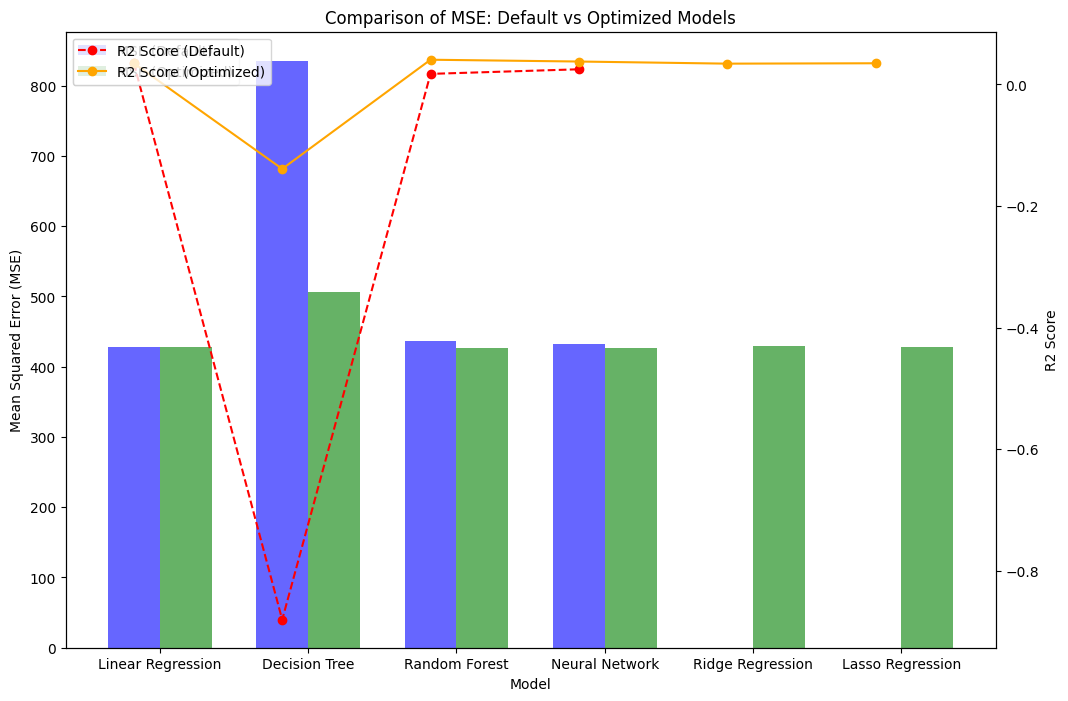

In [615]:

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting MSE for default and optimized models
bar_width = 0.35
index = np.arange(len(results_comparison['Model']))

bar1 = ax.bar(index, results_comparison['MSE (Default)'], bar_width, label='MSE (Default)', color='blue', alpha=0.6)
bar2 = ax.bar(index + bar_width, results_comparison['MSE (Optimized)'], bar_width, label='MSE (Optimized)', color='green', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of MSE: Default vs Optimized Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_comparison['Model'])
ax.legend()

# Add R² scores on secondary y-axis
ax2 = ax.twinx()
ax2.plot(results_comparison['Model'], results_comparison['R2 Score (Default)'], color='red', marker='o', linestyle='--', label='R2 Score (Default)')
ax2.plot(results_comparison['Model'], results_comparison['R2 Score (Optimized)'], color='orange', marker='o', linestyle='-', label='R2 Score (Optimized)')
ax2.set_ylabel('R2 Score')
ax2.legend(loc='upper left')

plt.show()

### Zusammenfassung:
Die Lineare Regression zeigt keine Veränderung, da hier keine Optimierungen vorgenommen wurden. Stattdessen wurden die Ridge Regression und Lasso Regression eingeführt und optimiert, wobei diese Modelle so gut wie keine Veränderungen bzw. eine leichte Verschlechterung aufweisen.

Der Decision Tree zeigt signifikante Verbesserungen sowohl im MSE als auch im R²-Score nach der Optimierung, obwohl der R²-Score immer noch negativ ist.

Random Forest und Neural Network zeigen leichte Verbesserungen nach der Optimierung, was auf eine marginale Verbesserung der Modellgenauigkeit und der Fähigkeit zur Erklärung der Varianz hinweist.

Insgesamt zeigt die Optimierung eine positive Wirkung auf die Modelle, insbesondere beim Decision Tree, wobei eine signifikante Verbesserung des MSE zu verzeichnen ist. Die anderen Modelle haben ebenfalls leichte Verbesserungen gezeigt, aber diese sind nicht so ausgeprägt. Dennoch bleibt das Modell der Linearen Regression weiterhin konkurrenzfähig.

<div class="alert alert-info">
    <h1>Resources</h1>
    <ul>
        <li><b>Internet Webseiten</b></li>
        <ul>
            <li><a href="https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic">A Statistical Analysis & ML workflow of Titanic</a></li>
            <li><a href="https://www.geeksforgeeks.org/decision-tree-introduction-example/">Decision Tree in Machine Learning</a></li>
            <li><a href="https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052">Decision Trees in Machine Learning</a></li>
            <li><a href="https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1">Gini Impurity and Entropy for Decision Tree</a></li>
            <li><a href="https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/">Random Forest Algorithm in Machine Learning</a></li>
            <li><a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Understanding Random Forest</a></li>
        </ul>
        <li><b>Wissenschaftliche Literaturen</b></li>
        <ul>
            <li><a href="https://www.researchgate.net/profile/Vladimir-Nasteski/publication/328146111_An_overview_of_the_supervised_machine_learning_methods/links/5c1025194585157ac1bba147/An-overview-of-the-supervised-machine-learning-methods.pdf">An overview of the supervised machine learning methods</a></li>
            <li><a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a></li>
            <li><a href="https://learning.oreilly.com/library/view/machine-learning-with/9781782162148/ch07.html#ch07lvl1sec37">Machine Learning with R</a></li>
            <li><a href="https://link.springer.com/chapter/10.1007/978-981-16-0336-5_4">Prediction of song popularity using machine learning concepts</a></li>
</div>